In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as mno

from ipywidgets import interact
from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [62]:
%time df = pd.read_csv('Dataset/data.csv',index_col=0)

CPU times: user 199 ms, sys: 40.3 ms, total: 240 ms
Wall time: 238 ms


In [63]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [64]:
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right                       1.0   
18206     €60K    €1K     1321          Right                       1.0   

       Weak Foot  Skill Moves       Work Rate 

In [65]:
df.shape

(18207, 88)

## Data Cleaning

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [67]:
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [68]:
df.isna().sum()/df.shape[0]*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Special                      0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Real Face                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight      

In [69]:
df = df.drop('Loaned From',axis=1)
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right                       1.0   
18206     €60K    €1K     1321          Right                       1.0   

       Weak Foot  Skill Moves       Work Rate 

In [70]:
df[df.Club.isna()]

ID               Name  Age  \
452    207439         L. Paredes   24   
538    156713       A. Granqvist   33   
568    229909           A. Lunev   26   
677    187347       I. Smolnikov   29   
874    187607          A. Dzyuba   29   
953    204341          Luís Neto   30   
997    223058         D. Kuzyaev   25   
1008   183389             G. Sio   29   
1120   156092          J. Villar   41   
1271   174381         C. Riveros   35   
1352   182879       B. Dzsudzsák   31   
1602   216335       Y. Gazinskiy   28   
1671   182579         V. Cáceres   33   
1819   225144             P. Tau   24   
1902   214692           C. Cueva   26   
1907   216742          M. Mevlja   28   
1933   245682          K. Traoré   26   
1936   245683          K. Fofana   26   
1964   207554        V. Claesson   26   
2065   177149           B. Jokič   32   
2080   219911      T. Hlatshwayo   28   
2192   216385           R. Ortiz   28   
2259   219740            Kahraba   24   
2289   203629         A. Erokhin   28   
2347   211592         A. Semenov   29   
2363   224909         P. Aguedar   30   
2399   245660          K. Konaté   26   
2413   245664            I. Koné   30   
2443   229804         A. Mitriţă   23   
2452   223152        S. Vilakazi   28   
2514   209102      M. Etxeberría   26   
2655   201751          I. Kovács   26   
2680   181795      F. Kudryashov   31   
2688   235814          R. Benzar   26   
2724   165429          C. Keşerü   31   
2827   189024        M. Banguera   32   
2849   229739        J. Góralski   25   
2913   181375         M. Martins   31   
2984   205211          M. Borjan   30   
2999   186274          K. Rausch   28   
3037   207797          Y. Banana   26   
3050   179897      R. Sigurðsson   32   
3103   229585         M. Degenek   24   
3170   221422         S. Ingason   24   
3208   190461     B. Sigurðarson   27   
3282   187415          V. Granat   31   
3503   225887           D. Gonzo   22   
3562   246386          B. Méndez   18   
3625   194945           R. Varga   28   
3630   246403         B. Caicedo   26   
3631   224900        A. Silbeira   22   
3710   245665        Y. Ouattara   34   
3736   221610          D. Dibusz   27   
3786   140222        P. Da Silva   38   
3898   201707           A. Fiola   28   
3943   217082           W. Ángel   25   
3971   160770        O. Skúlason   35   
4121   196913          J. Campos   30   
4191   231493    L. Kleinheisler   24   
4217   170828          Shikabala   32   
4257   225884          J. Riojas   30   
4274   201572          M. Korhut   29   
4298   225900       J. Sambenito   26   
4321   246387          M. Suárez   22   
4387   246405          B. Angulo   22   
4667   223208          Z. Kalmár   23   
4707   186355           E. Conde   35   
4823   222224           P. Anton   27   
4876   204062            D. Keet   28   
4945   246067            H. Vaca   20   
4991   243008         M. Trávník   24   
5018   153160          R. Raldes   37   
5051   222544       E. Koulouris   22   
5061   241234        P. Mahlambi   20   
5082   207448         J. Paredes   30   
5126   225894          L. Cáceda   30   
5245   211339         R. Cardozo   28   
5272   199572            C. Deac   32   
5276   193685         S. Manolev   32   
5387   242614      I. Nedelcearu   22   
5432   166851         K. Árnason   35   
5505   209109        J. Silbeira   22   
5543   201698          M. Pátkai   30   
5587   211440          D. Ndlovu   28   
5595   201714            D. Böde   31   
5614   175608           A. Fathi   33   
5656   202756         N. Bodurov   32   
5693   226062        O. Ruisalvo   26   
5777   212518         B. Sangaré   32   
5795   206379     H. Halldórsson   34   
5883   234054          C. Cáceda   26   
5895   203594          H. Kekana   33   
5913   243533           M. Hamdy   23   
5921   193359            R. Romo   28   
5922   196688           A. Corzo   29   
5940   220246       B. Mkhwanazi   28   
5943   183382        G. Mandjeck  

Text(0.5, 1.0, 'Checking Missing Values Heat Map ')

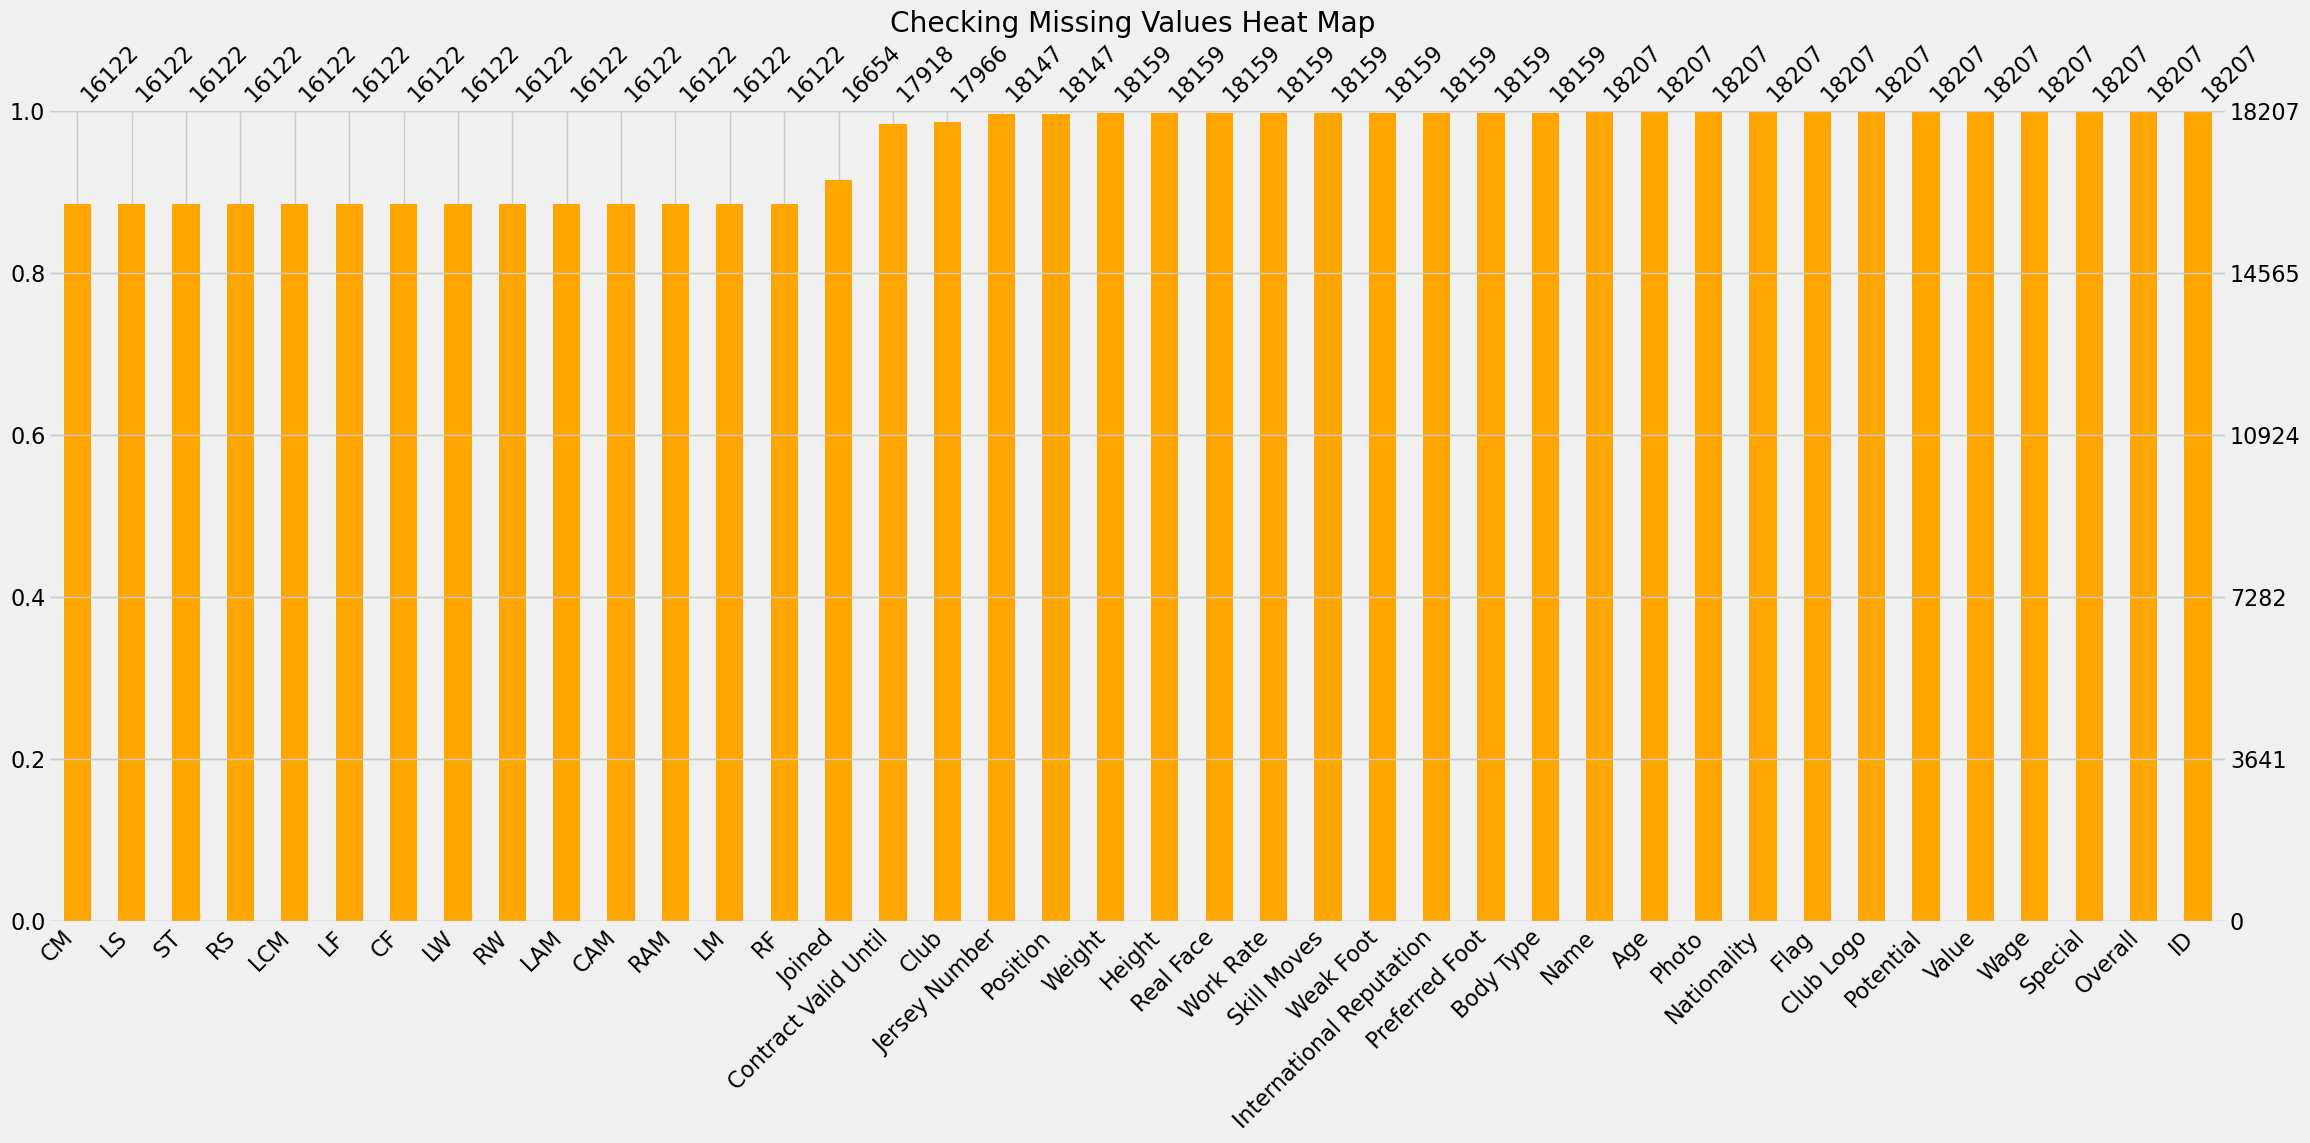

In [71]:
mno.bar(df.iloc[:,:40],
       color='orange',
       sort='ascending')
plt.title('Checking Missing Values Heat Map ')

Text(0.5, 1.0, 'Checking Missing Values Heat Map ')

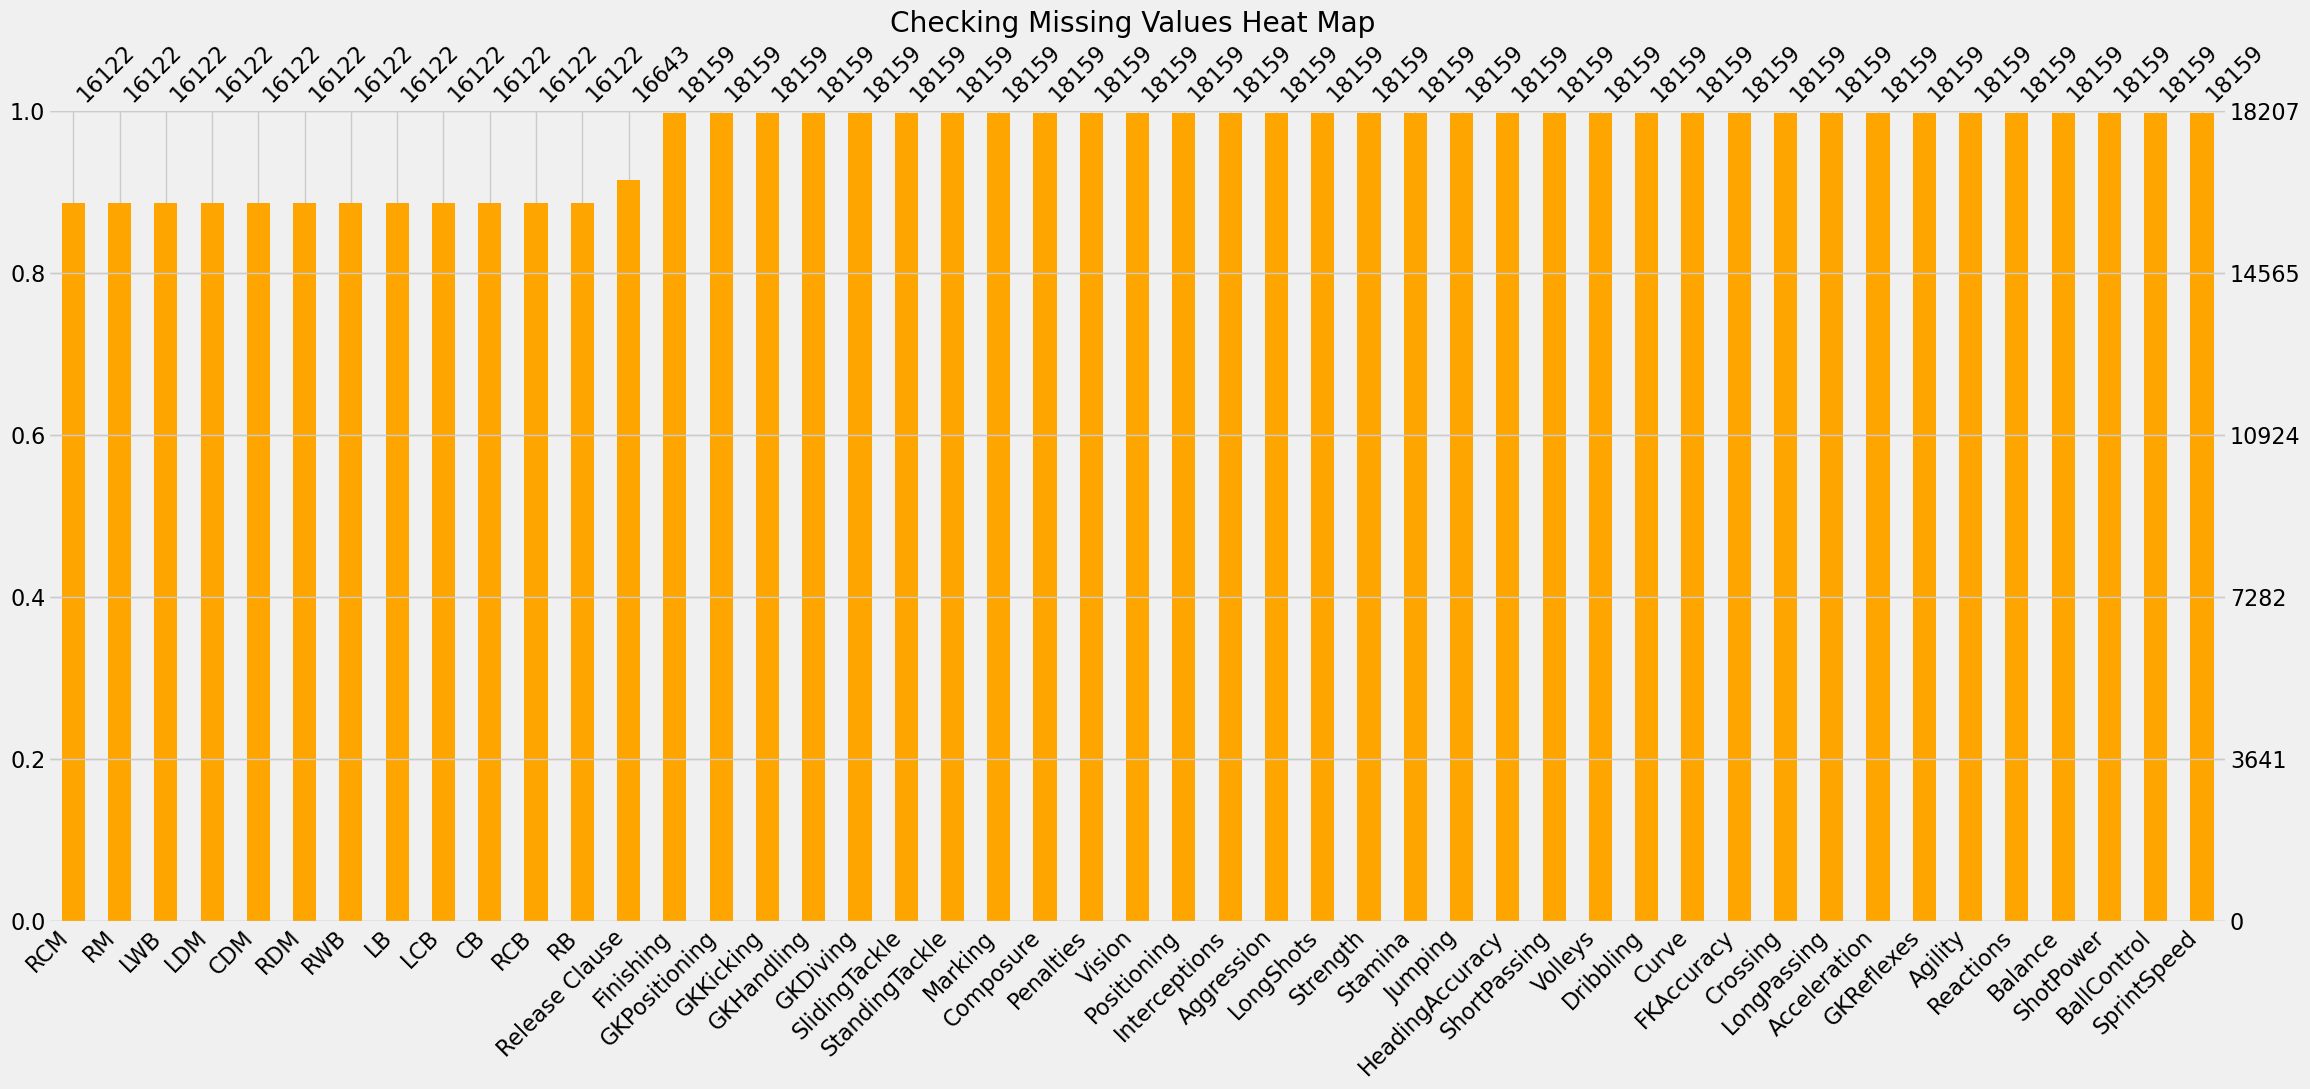

In [72]:
mno.bar(df.iloc[:,40:],
       color='orange',
       sort='ascending')
plt.title('Checking Missing Values Heat Map ')

In [73]:
'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Joined', 'Comtract Valid Until', 'Club', 'Release Clause'

('LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Joined',
 'Comtract Valid Until',
 'Club',
 'Release Clause')

In [74]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

In [75]:
df.isna().sum(axis=1).sort_values(ascending=False)

13261    74
13250    74
13277    74
13278    74
13279    74
         ..
6661      0
6662      0
6663      0
6664      0
18206     0
Length: 18207, dtype: int64

In [76]:
index = df[(df.isna().sum(axis=1)/df.shape[1])>.50].index
index

Index([13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244, 13245,
       13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253, 13254, 13255,
       13256, 13257, 13258, 13259, 13260, 13261, 13262, 13263, 13264, 13265,
       13266, 13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275,
       13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283],
      dtype='int64')

In [77]:
# Dropped the ROws which had more than 50% Nan values
df = df.drop(index=index,axis=0)

In [78]:
df.isna().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until         241
Height                         0
Weight                         0
LS                          2037
ST                          2037
RS                          2037
LW                          2037
LF        

In [79]:
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right                       1.0   
18206     €60K    €1K     1321          Right                       1.0   

       Weak Foot  Skill Moves       Work Rate 

In [80]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [81]:
df.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW        

## Feature Engineering

In [82]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

In [83]:
def defending(df):
    return round((df[['Marking', 'StandingTackle', 
                      'SlidingTackle']].mean()).mean())
def general(df):
    return round((df[['HeadingAccuracy', 'Dribbling', 
                      'Curve', 'BallControl']].mean()).mean())
def mental(df):
    return round((df[['Aggression', 'Interceptions', 
                      'Positioning', 'Vision', 'Composure']].mean()).mean())
def passing(df):
    return round((df[['Crossing', 'ShortPassing', 
                      'LongPassing']].mean()).mean())
def power(df):
    return round((df[['Balance', 'Jumping', 
                      'Stamina', 'Strength']].mean()).mean())
def mobility(df):
    return round((df[['Acceleration', 'SprintSpeed', 
                      'Agility', 'Reactions']].mean()).mean())
def rating(df):
    return round((df[['Overall', 'Potential']].mean()).mean())
    
def shooting(df):
    return round((df[['Finishing', 'Volleys', 'FKAccuracy', 
                      'ShotPower','LongShots', 'Penalties']].mean()).mean())

In [84]:
df['Defending'] = df.apply(defending,axis=1)
df['General']   = df.apply(general,axis=1)
df['Mental']    = df.apply(mental,axis=1)
df['Passing']   = df.apply(passing,axis=1)
df['Power']     = df.apply(power,axis=1)
df['Mobility']  = df.apply(mobility,axis=1)
df['Rating']    = df.apply(rating,axis=1)
df['Shooting']  = df.apply(shooting,axis=1)

In [85]:
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right                       1.0   
18206     €60K    €1K     1321          Right                       1.0   

       Weak Foot  Skill Moves       Work Rate 

<Axes: >

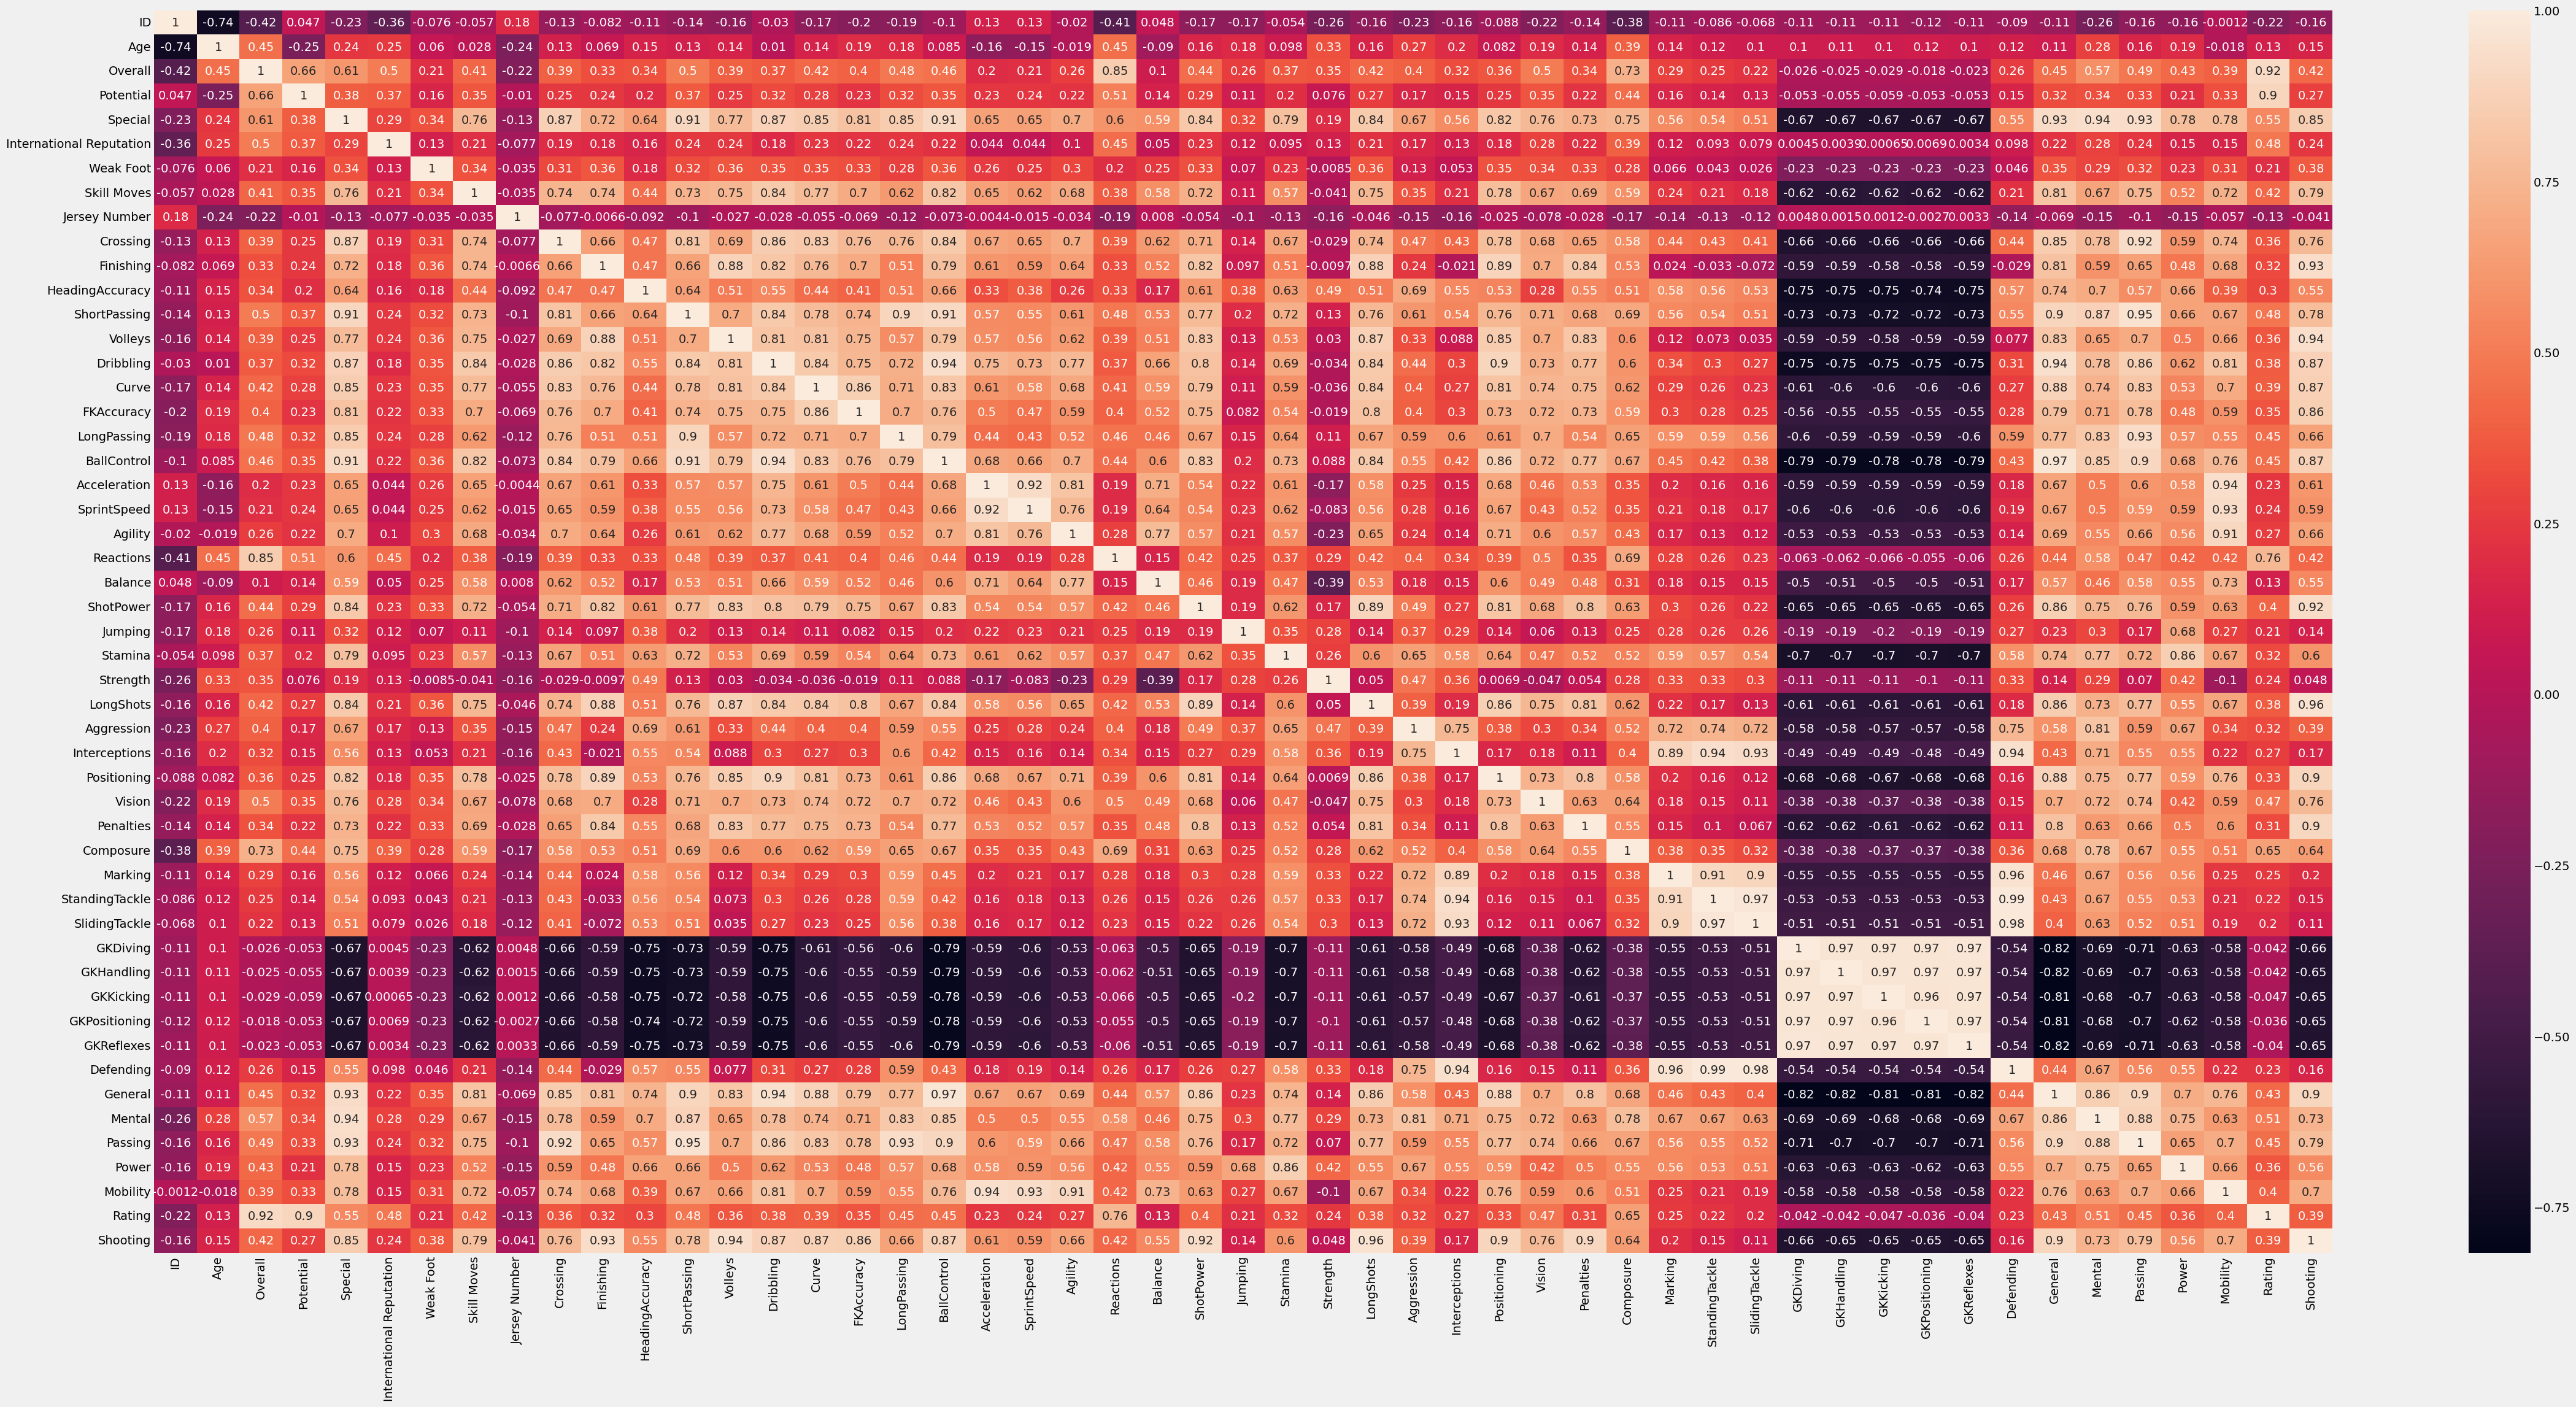

In [86]:
plt.figure(figsize=(51,25))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Text(0.5, 0.98, 'Score Distributions for Different Abilities')

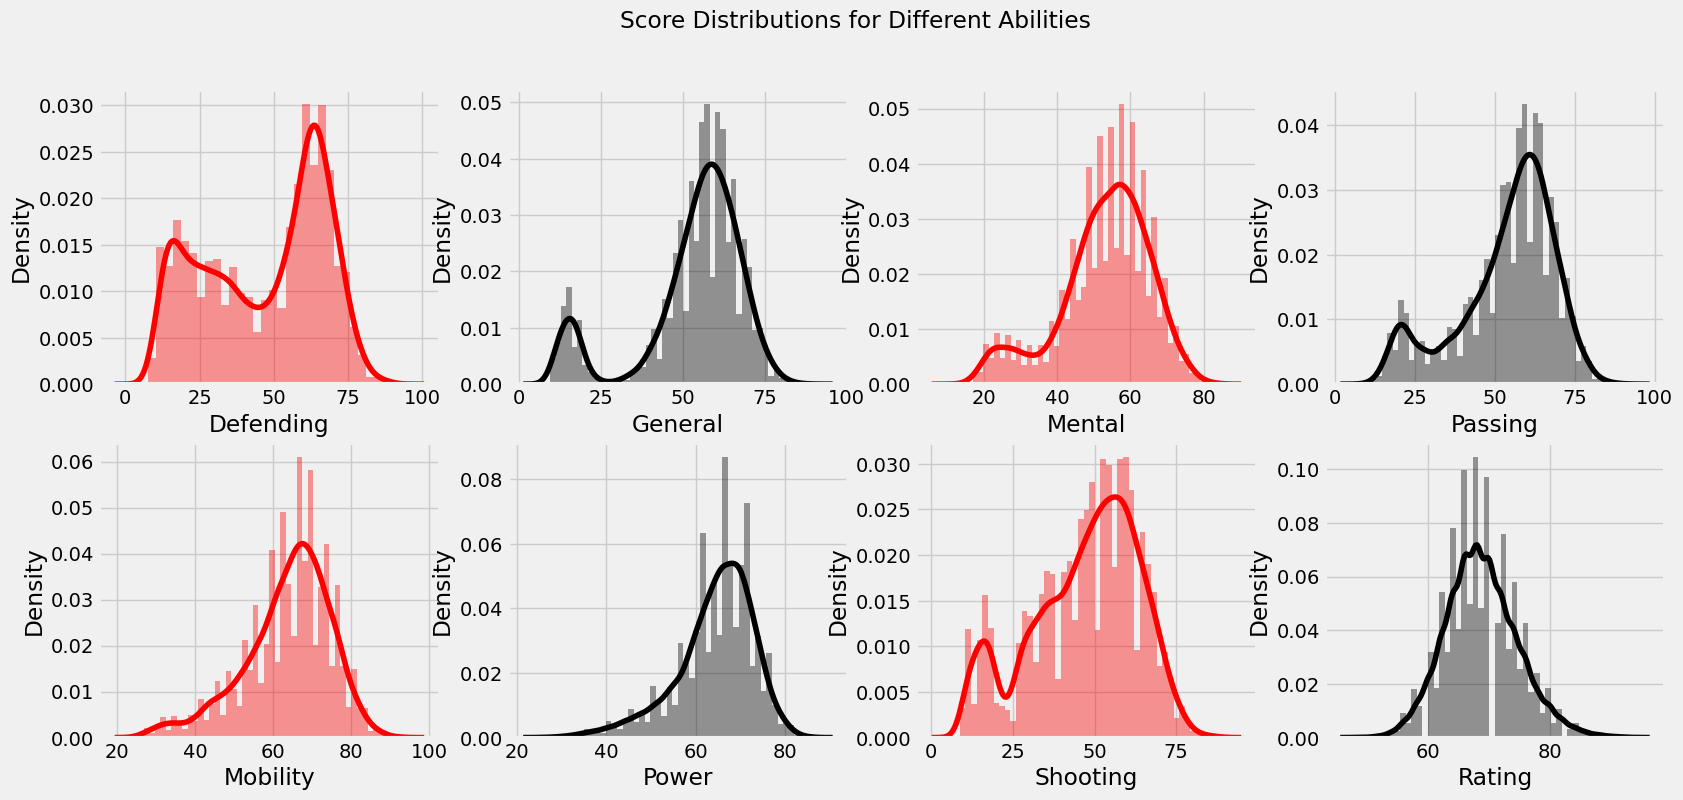

In [87]:
plt.figure(figsize=(18,8))
plt.subplot(2,4,1)
sns.distplot(df.Defending,color='r')
plt.subplot(2,4,2)
sns.distplot(df.General, color='black')
plt.subplot(2,4,3)
sns.distplot(df.Mental, color='r')
plt.subplot(2,4,4)
sns.distplot(df.Passing, color='black')
plt.subplot(2,4,5)
sns.distplot(df.Mobility, color='red')
plt.subplot(2,4,6)
sns.distplot(df.Power, color='black')
plt.subplot(2,4,7)
sns.distplot(df.Shooting, color='red')
plt.subplot(2,4,8)
sns.distplot(df.Rating, color='black')

plt.suptitle('Score Distributions for Different Abilities')

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

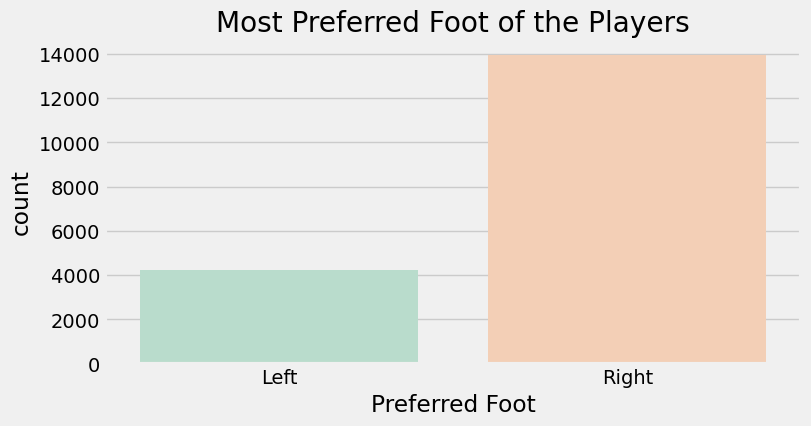

In [88]:
plt.figure(figsize=(8,4))
sns.countplot(x = df['Preferred Foot'], palette = 'Pastel2')
plt.title('Most Preferred Foot of the Players')

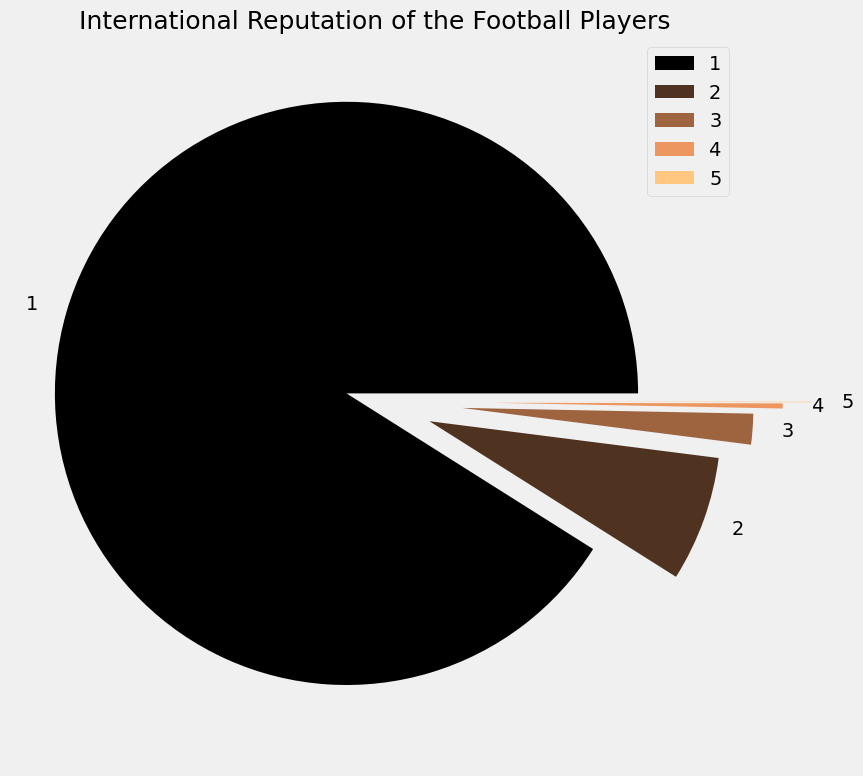

In [89]:
labels = ['1','2','3','4','5']
sizes = df['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [.1,.2,.3,.4,.5]

plt.figure(figsize=(9,9))
plt.pie(sizes, labels=labels, colors=colors, explode = explode)
plt.title('International Reputation of the Football Players',fontsize=18)
plt.legend()

In [90]:
df[df['International Reputation']==5][['Name','Nationality',
                     'Overall']].sort_values('Overall',ascending=False).style.background_gradient('autumn')

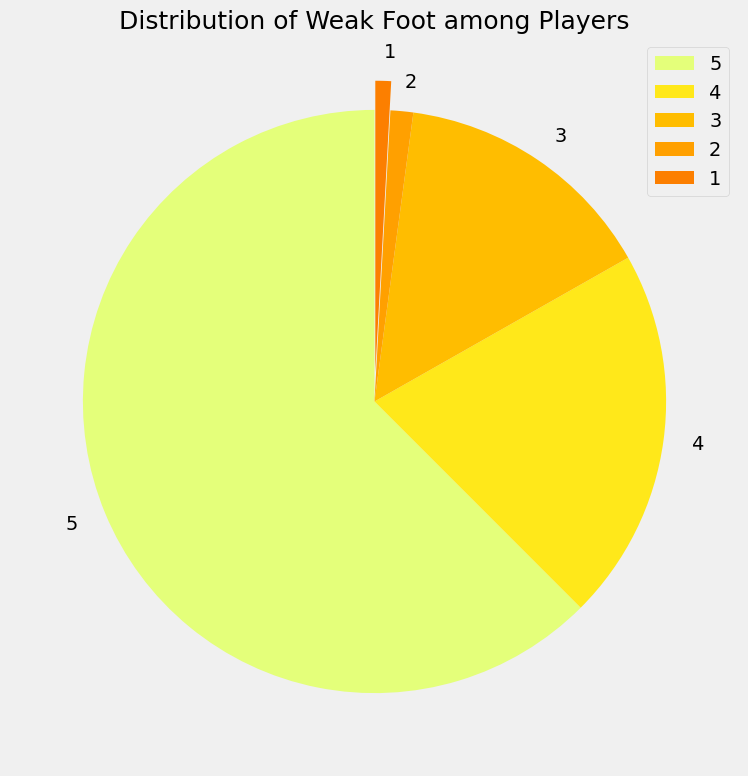

In [91]:
label = ['5','4','3','2','1']
size = df['Weak Foot'].value_counts()
color = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,.1]

plt.figure(figsize=(9,9))
plt.pie(size, labels=label, colors=color, explode = explode,startangle=90)
plt.title('Distribution of Weak Foot among Players',fontsize=18)
plt.legend()

Text(0.5, 1.0, 'Comparision of Positions of Players')

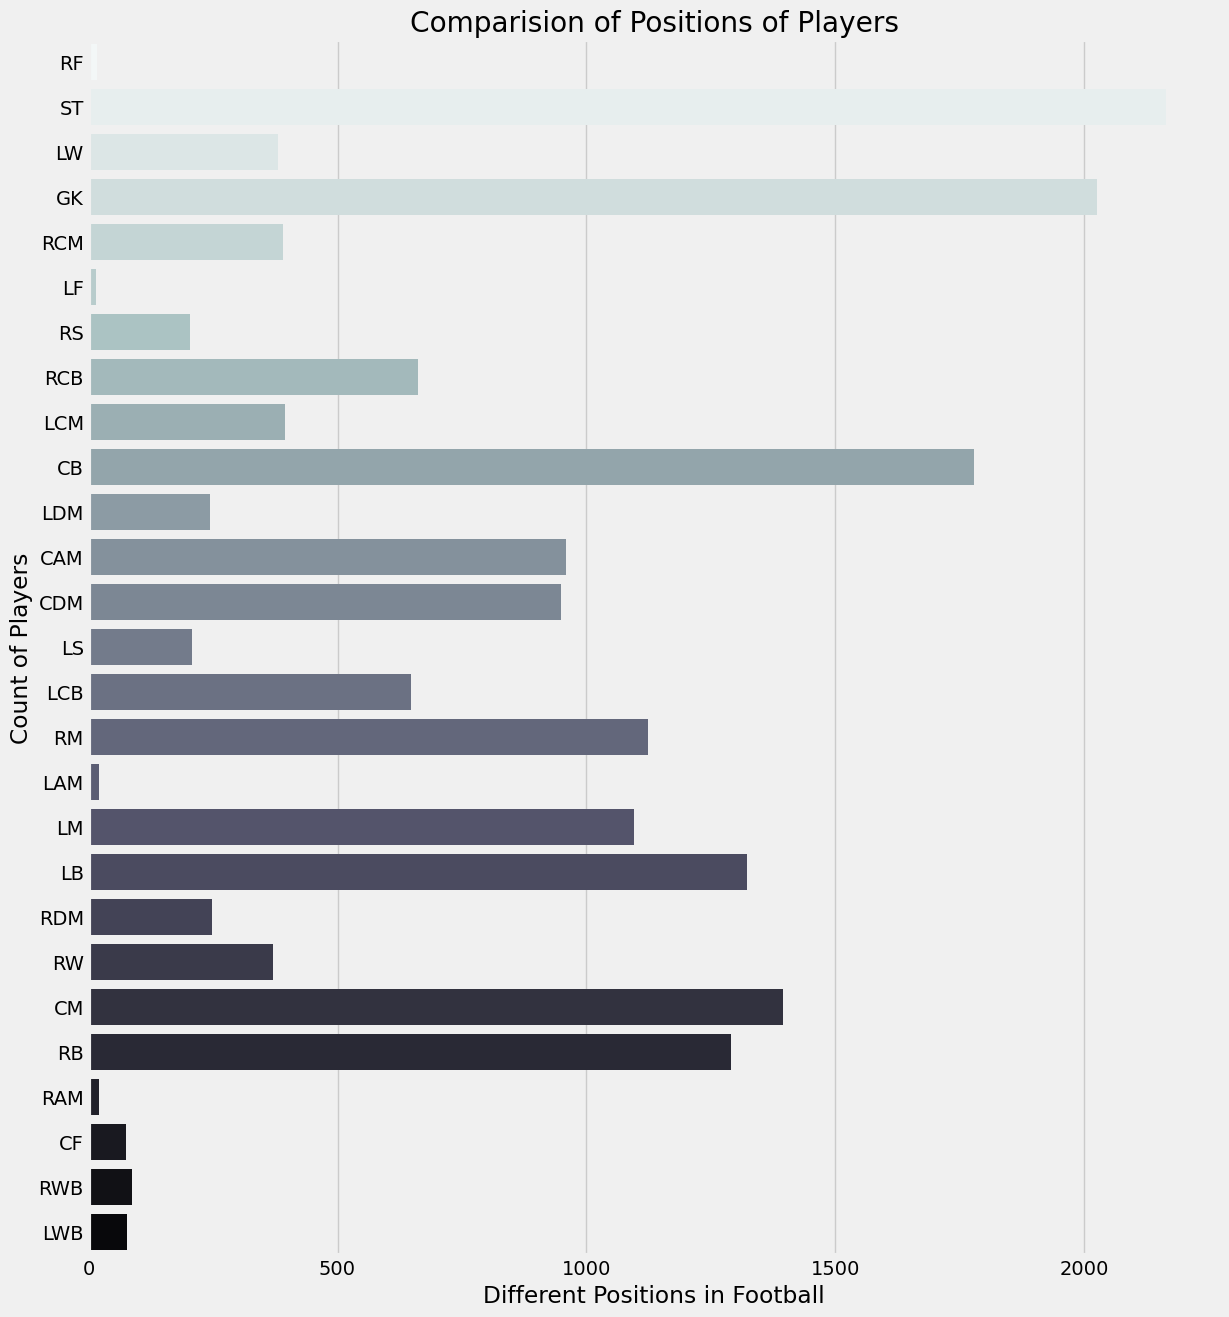

In [92]:
plt.figure(figsize=(13,15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y='Position', data=df, palette='bone_r')
ax.set_xlabel('Different Positions in Football')
ax.set_ylabel('Count of Players')
ax.set_title('Comparision of Positions of Players')


Text(0.5, 1.0, "Distribution of Player's Weight")

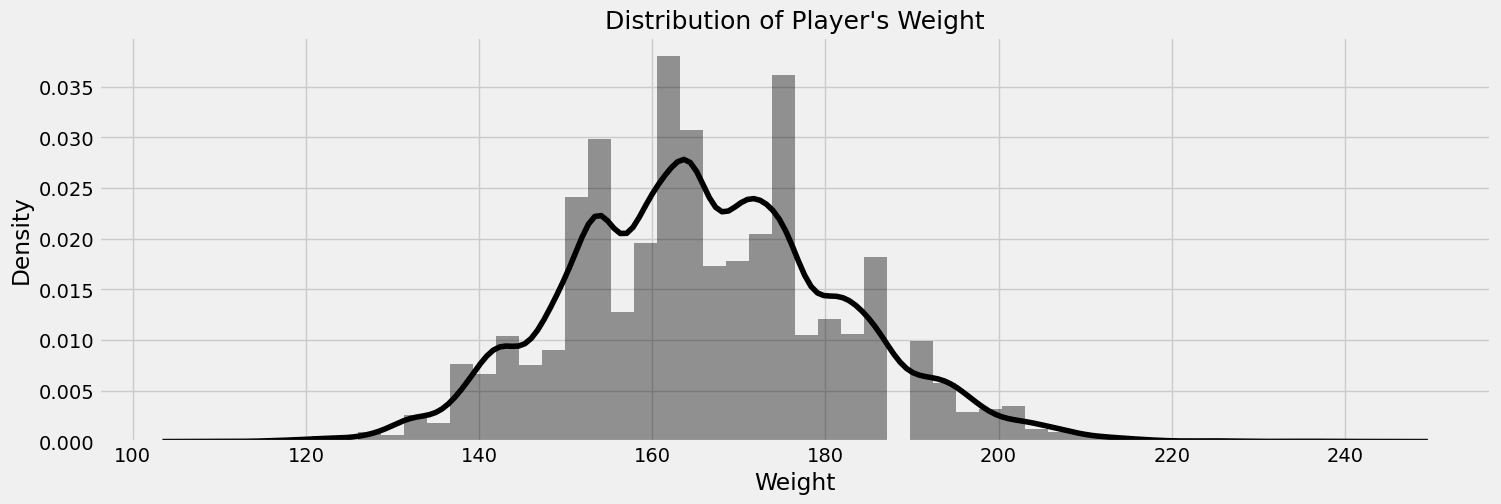

In [93]:
def weight(value):
    return float(value.replace('lbs',''))

df.Weight = df.Weight.apply(lambda x: weight(x))

sns.distplot(df.Weight,color='black')
plt.title('Distribution of Player\'s Weight',fontsize=18)

In [94]:
def wage(column):
    out = column.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

In [95]:
df.Value = df.Value.apply(lambda x:wage(x))
df.Wage = df.Wage.apply(lambda x:wage(x))

Text(0.5, 1.0, 'Distribution of Wages of Players')

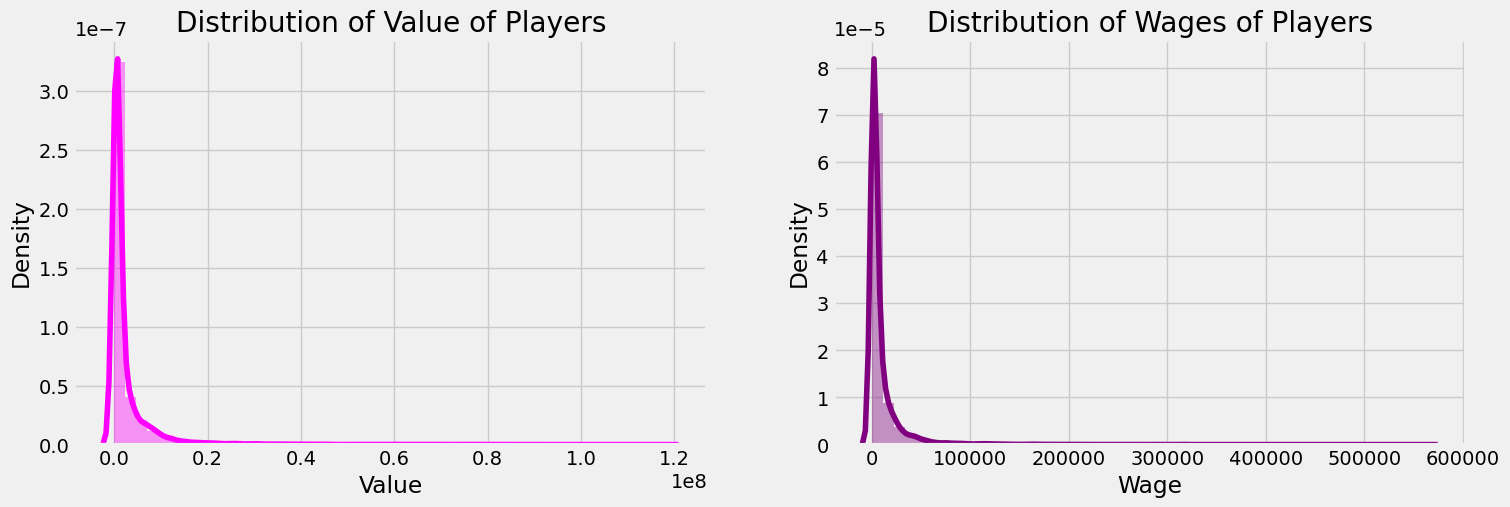

In [96]:
plt.rcParams['figure.figsize'] = (16,5)
plt.subplot(1,2,1)
sns.distplot(df.Value,color='magenta')
plt.title('Distribution of Value of Players')

plt.subplot(1,2,2)
sns.distplot(df.Wage,color='purple')
plt.title('Distribution of Wages of Players')

Text(0.5, 1.0, 'Count of Players on the Basis of their Skill Moves')

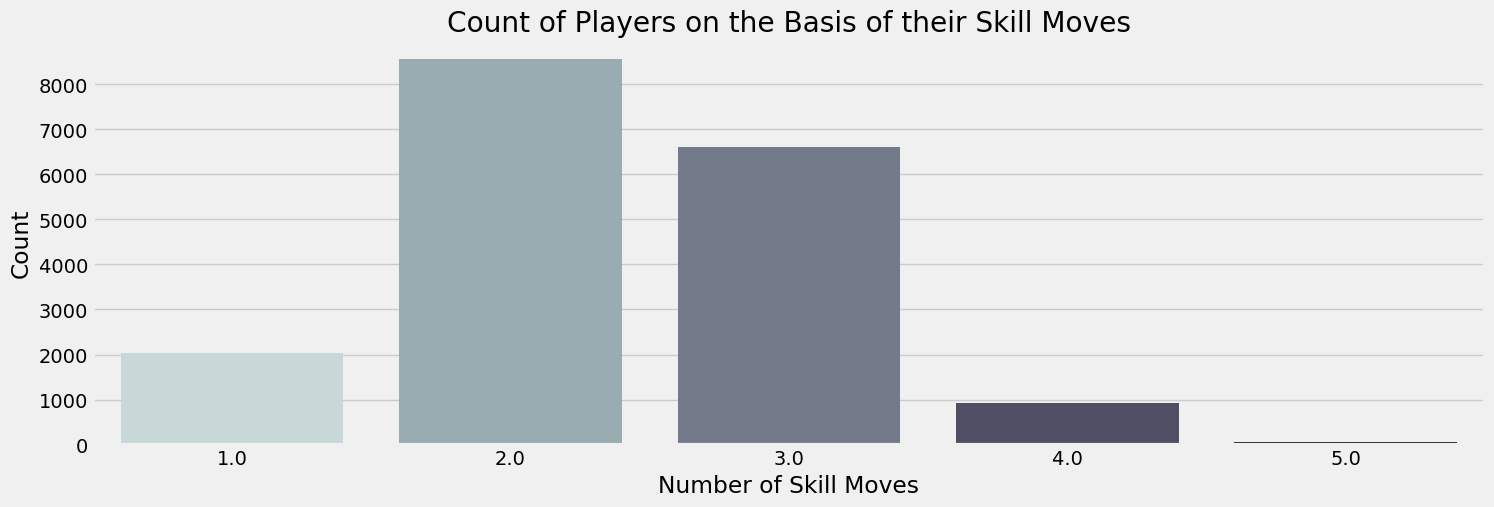

In [97]:
sns.countplot(x = 'Skill Moves', data = df, palette = 'bone_r')
plt.xlabel('Number of Skill Moves')
plt.ylabel('Count')
plt.title('Count of Players on the Basis of their Skill Moves')

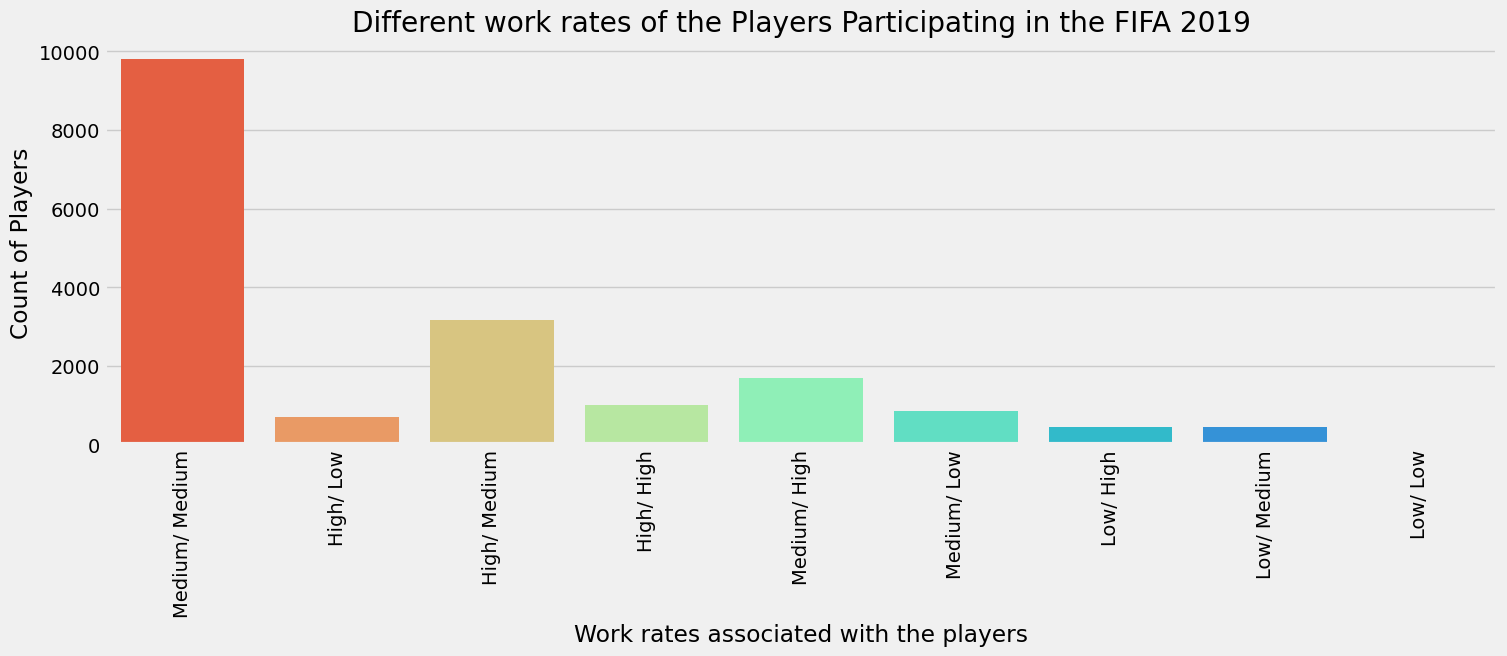

In [98]:
ax = sns.countplot(x = 'Work Rate', data = df, palette = 'rainbow_r')
plt.xlabel('Work rates associated with the players')
plt.ylabel('Count of Players')
plt.title('Different work rates of the Players Participating in the FIFA 2019')
plt.xticks(rotation=90)
plt.show()

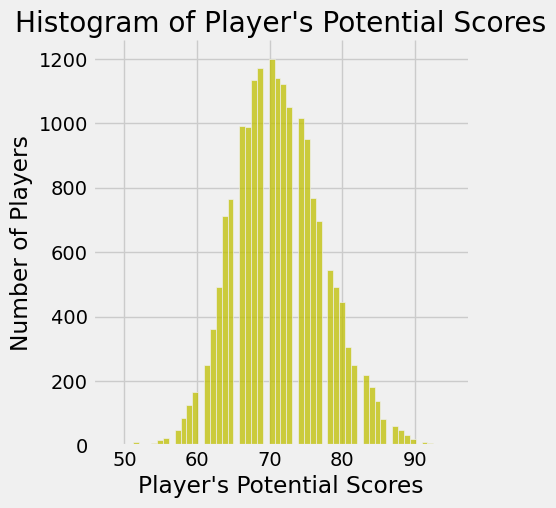

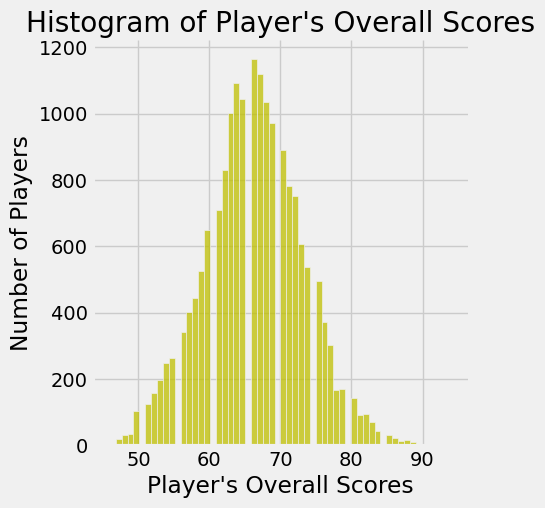

In [99]:

x= df.Potential
sns.displot(x,bins=58,kde=False,color='y')
plt.xlabel('Player\'s Potential Scores')
plt.ylabel('Number of Players')
plt.title('Histogram of Player\'s Potential Scores')

y= df.Overall
sns.displot(y,bins=58,kde=False,color='y')
plt.xlabel('Player\'s Overall Scores')
plt.ylabel('Number of Players')
plt.title('Histogram of Player\'s Overall Scores')

plt.show()

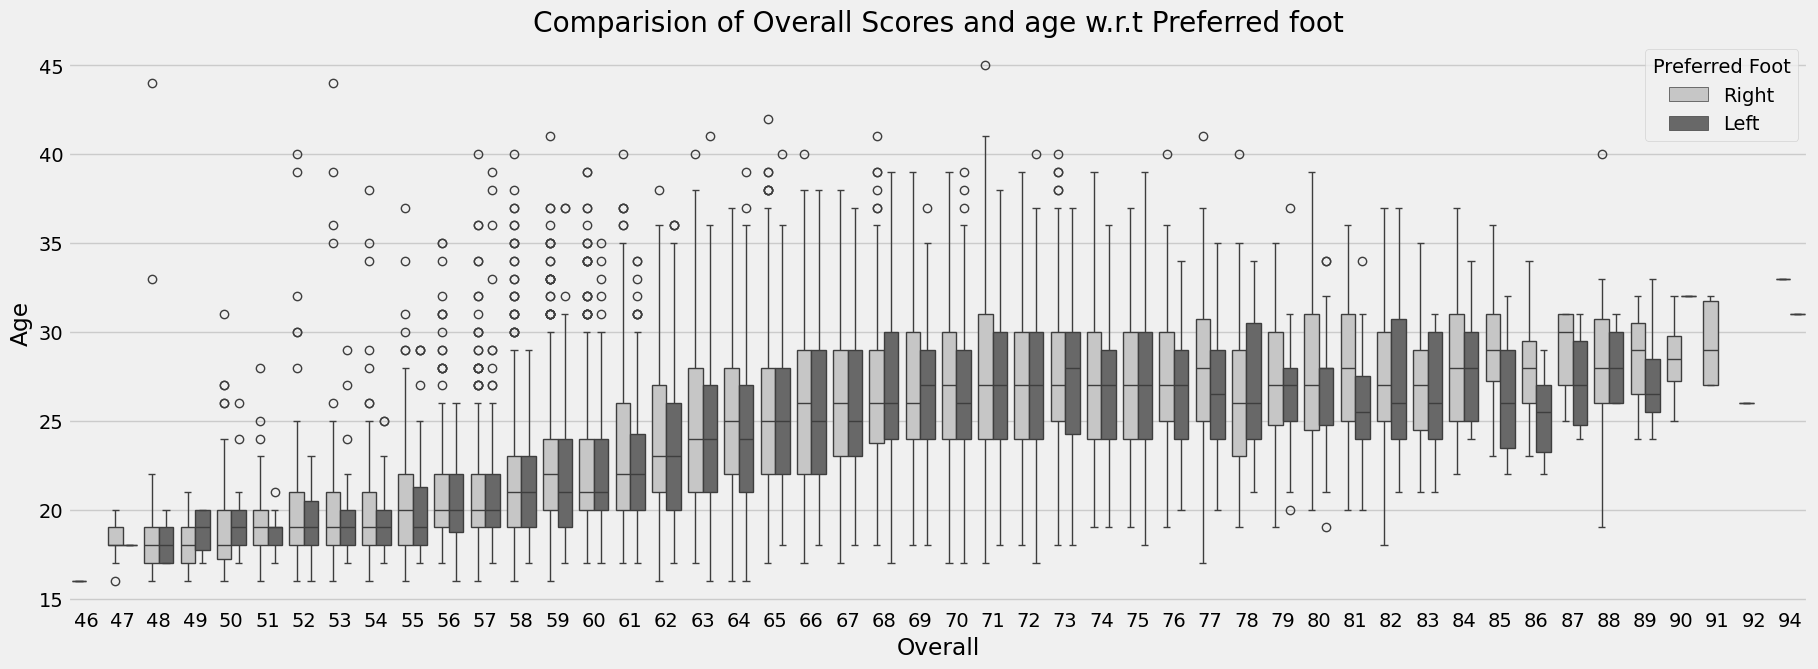

In [100]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df.Overall, y=df.Age, hue = df['Preferred Foot'], palette='Greys')
plt.title('Comparision of Overall Scores and age w.r.t Preferred foot')
plt.show()

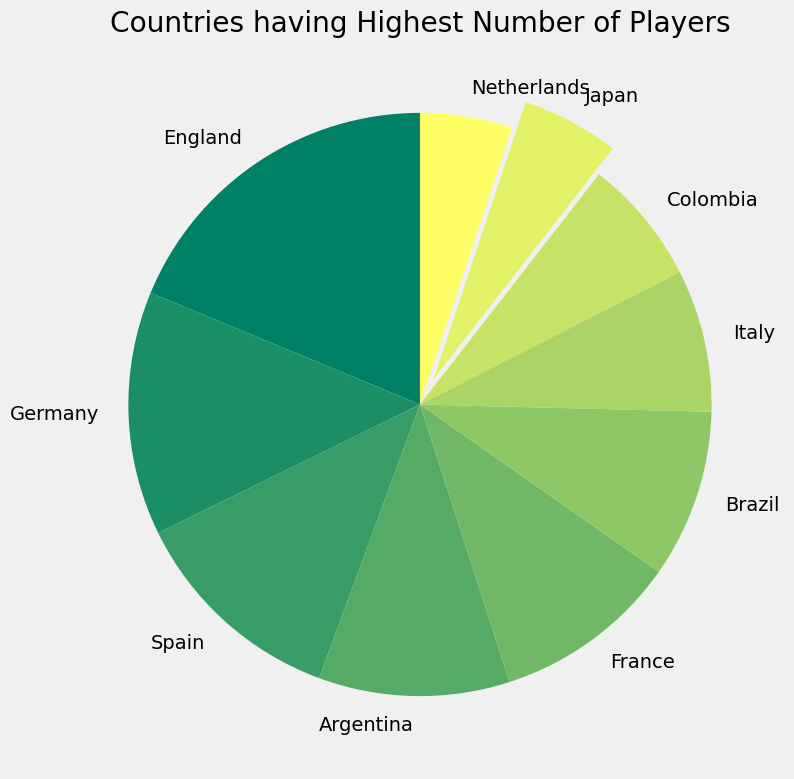

In [101]:
plt.figure(figsize=(9,9))
df['Nationality'].value_counts().head(10).plot(kind='pie',cmap='summer',
                                              startangle=90,explode=[0,0,0,0,0,0,0,0,.1,0])
plt.title('Countries having Highest Number of Players')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Distribution of Weight of Players from Different Countries')

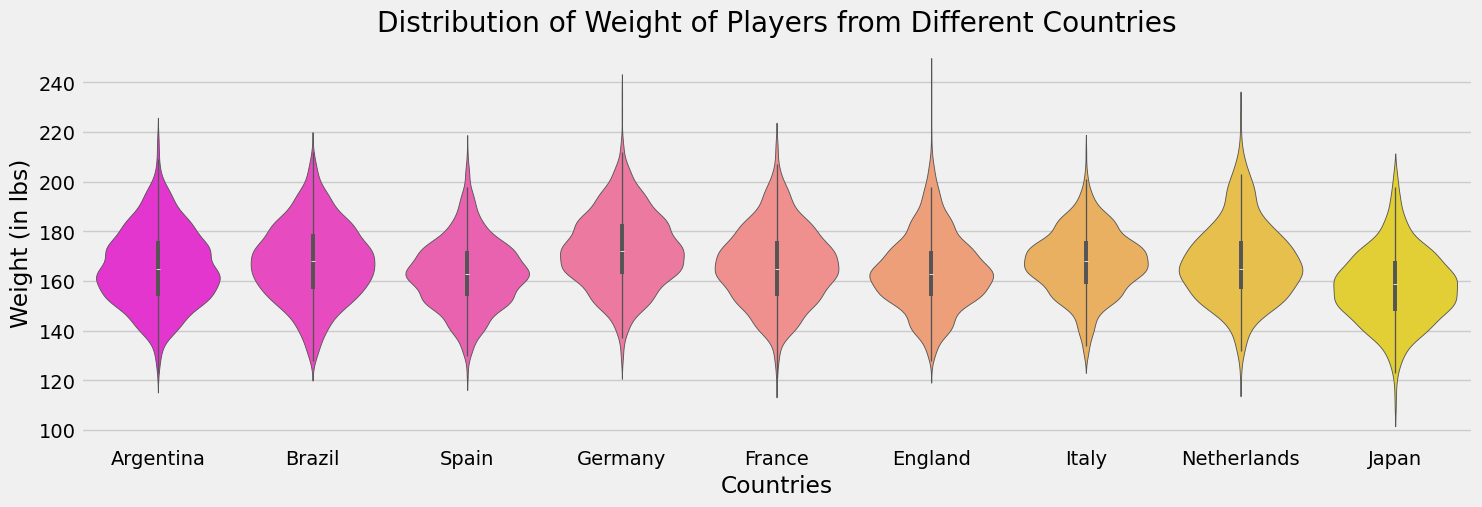

In [102]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
data_countries = df.loc[df.Nationality.isin(some_countries) & df.Weight]

sns.violinplot(x=data_countries.Nationality,y=data_countries.Weight,palette='spring')
plt.xlabel('Countries')
plt.ylabel('Weight (in lbs)')
plt.title('Distribution of Weight of Players from Different Countries')

Text(0.5, 1.0, 'Distribution of Overall Scores of Players from Different Countries')

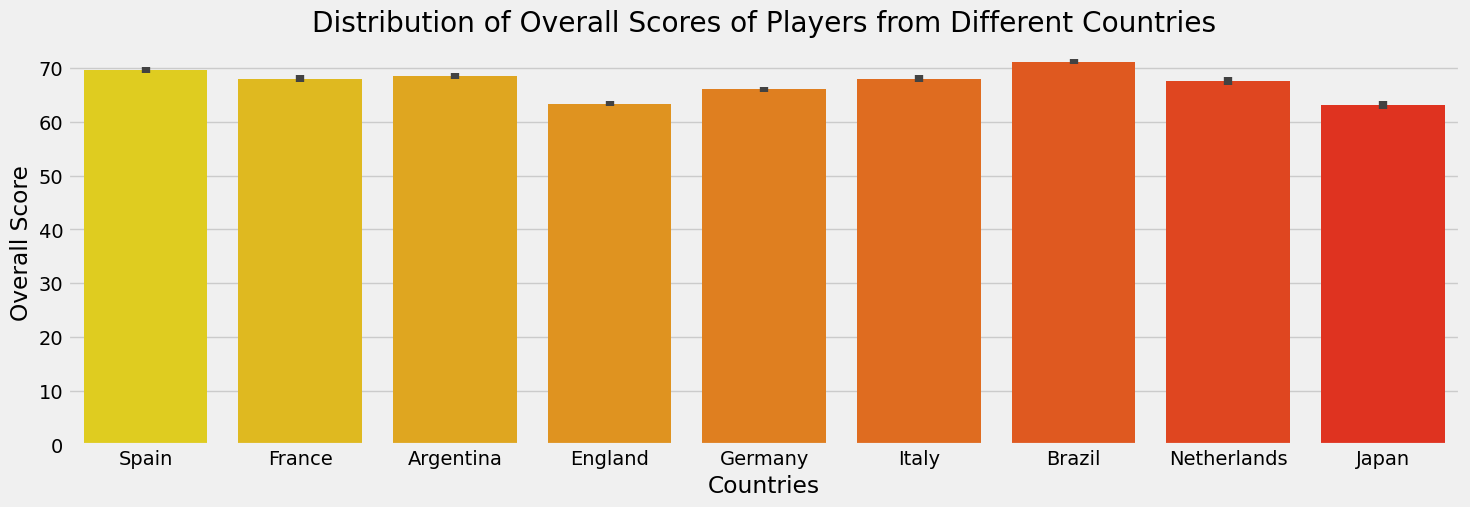

In [103]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
data_countries = df.loc[df.Nationality.isin(some_countries) & df.Overall]

sns.barplot(x=data_countries.Nationality,y=data_countries.Overall,palette='autumn_r')
plt.xlabel('Countries')
plt.ylabel('Overall Score')
plt.title('Distribution of Overall Scores of Players from Different Countries')

Text(0.5, 1.0, 'Distribution of Wage of Players from Different Countries')

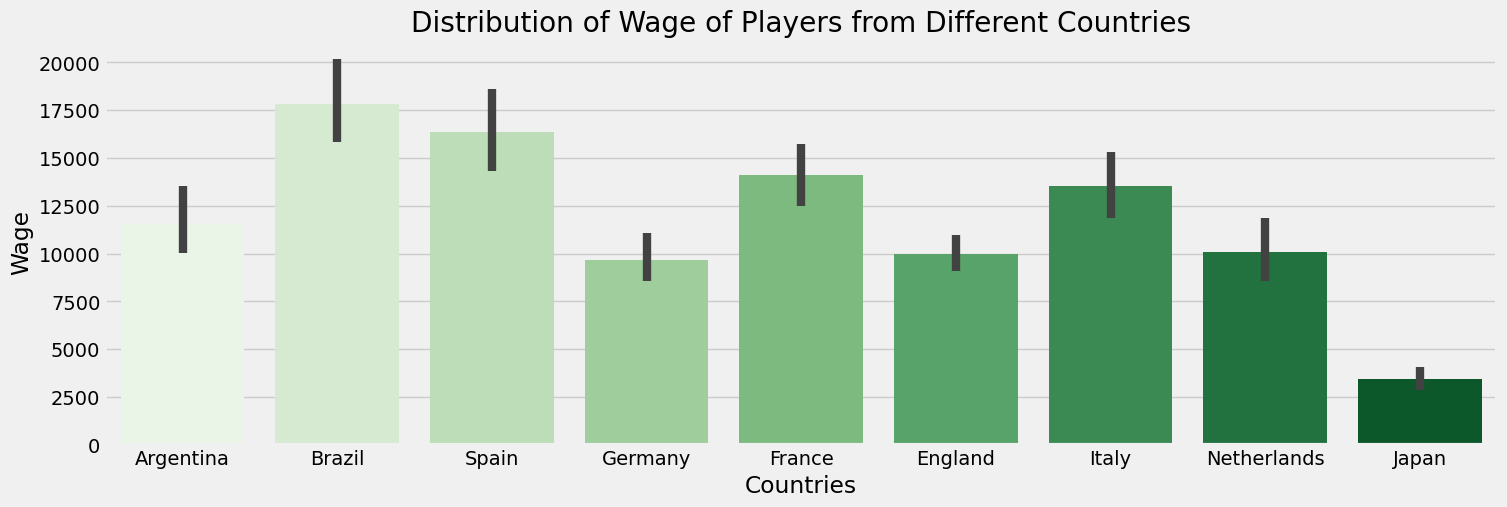

In [104]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
data_countries = df.loc[df.Nationality.isin(some_countries) & df.Wage]

sns.barplot(x=data_countries.Nationality,y=data_countries.Wage,palette='Greens')
plt.xlabel('Countries')
plt.ylabel('Wage')
plt.title('Distribution of Wage of Players from Different Countries')

Text(0.5, 1.0, 'Distribution of International Reputation of Players from Different Countries')

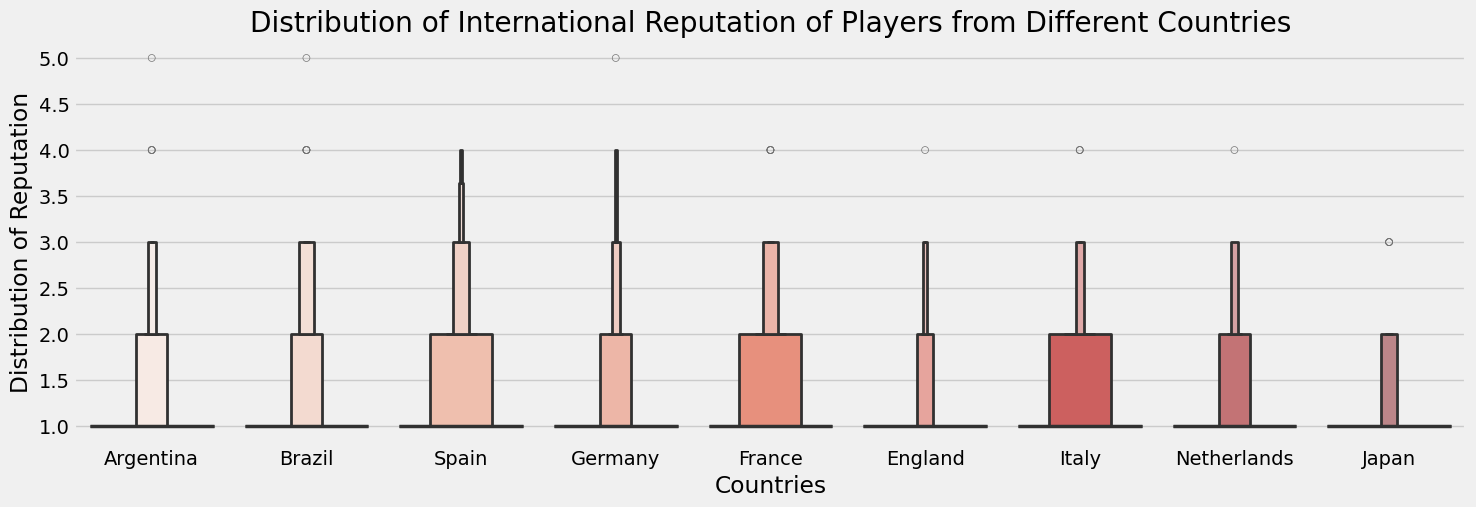

In [105]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
data_countries = df.loc[df.Nationality.isin(some_countries) & df['International Reputation']]

sns.boxenplot(x=data_countries.Nationality,y=data_countries['International Reputation'],palette='Reds')
plt.xlabel('Countries')
plt.ylabel('Distribution of Reputation')
plt.title('Distribution of International Reputation of Players from Different Countries')

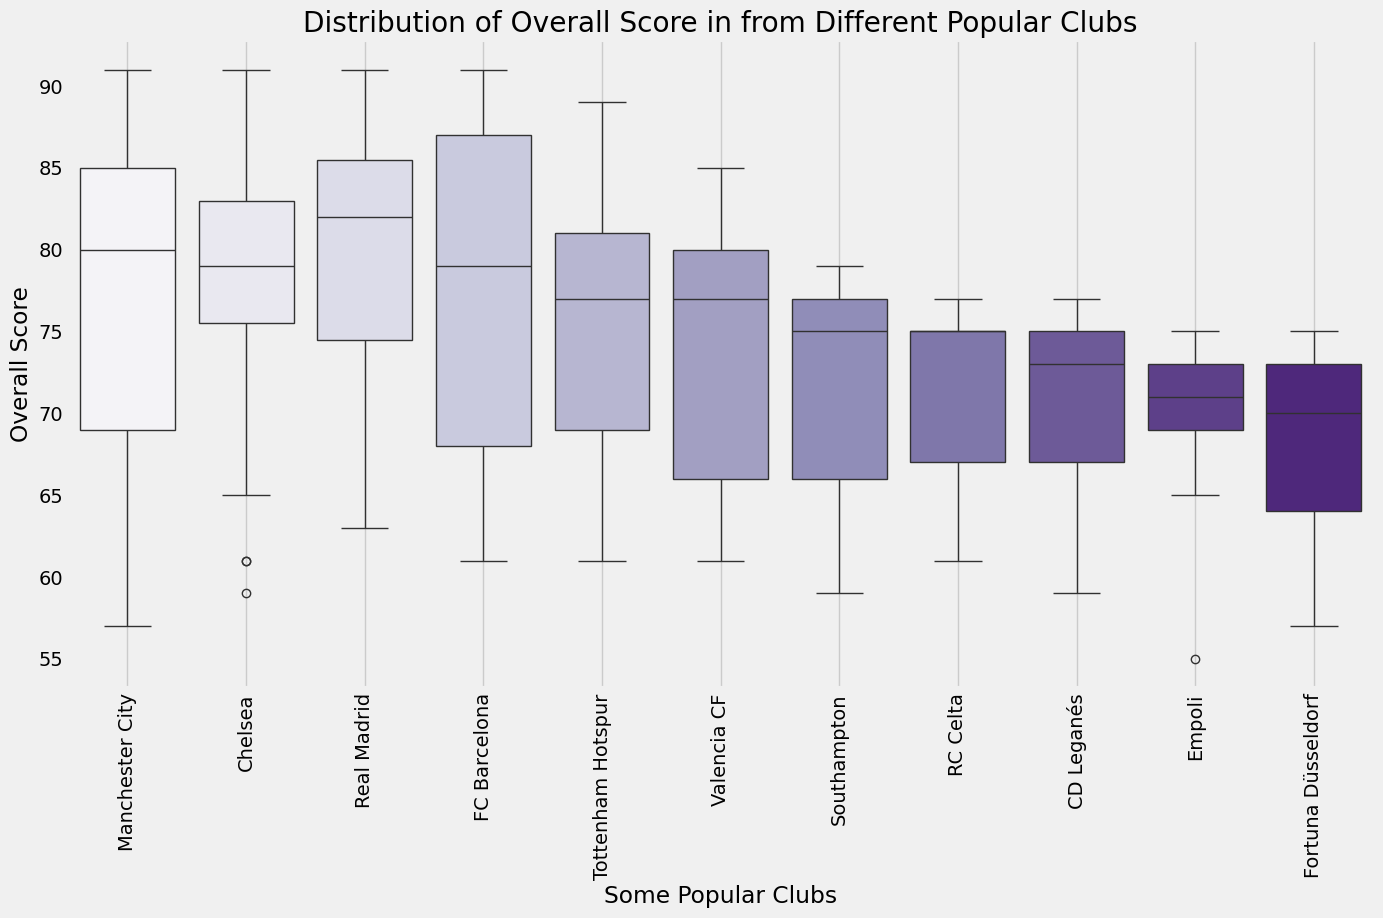

In [106]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta',  'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
              'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = df.loc[df.Club.isin(some_clubs) & df.Overall]

plt.figure(figsize=(15,8))
sns.boxplot(x=data_clubs.Club,y=data_clubs.Overall,palette='Purples')
plt.xlabel('Some Popular Clubs')
plt.ylabel('Overall Score')
plt.title('Distribution of Overall Score in from Different Popular Clubs')
plt.xticks(rotation=90)
plt.grid()
plt.show()

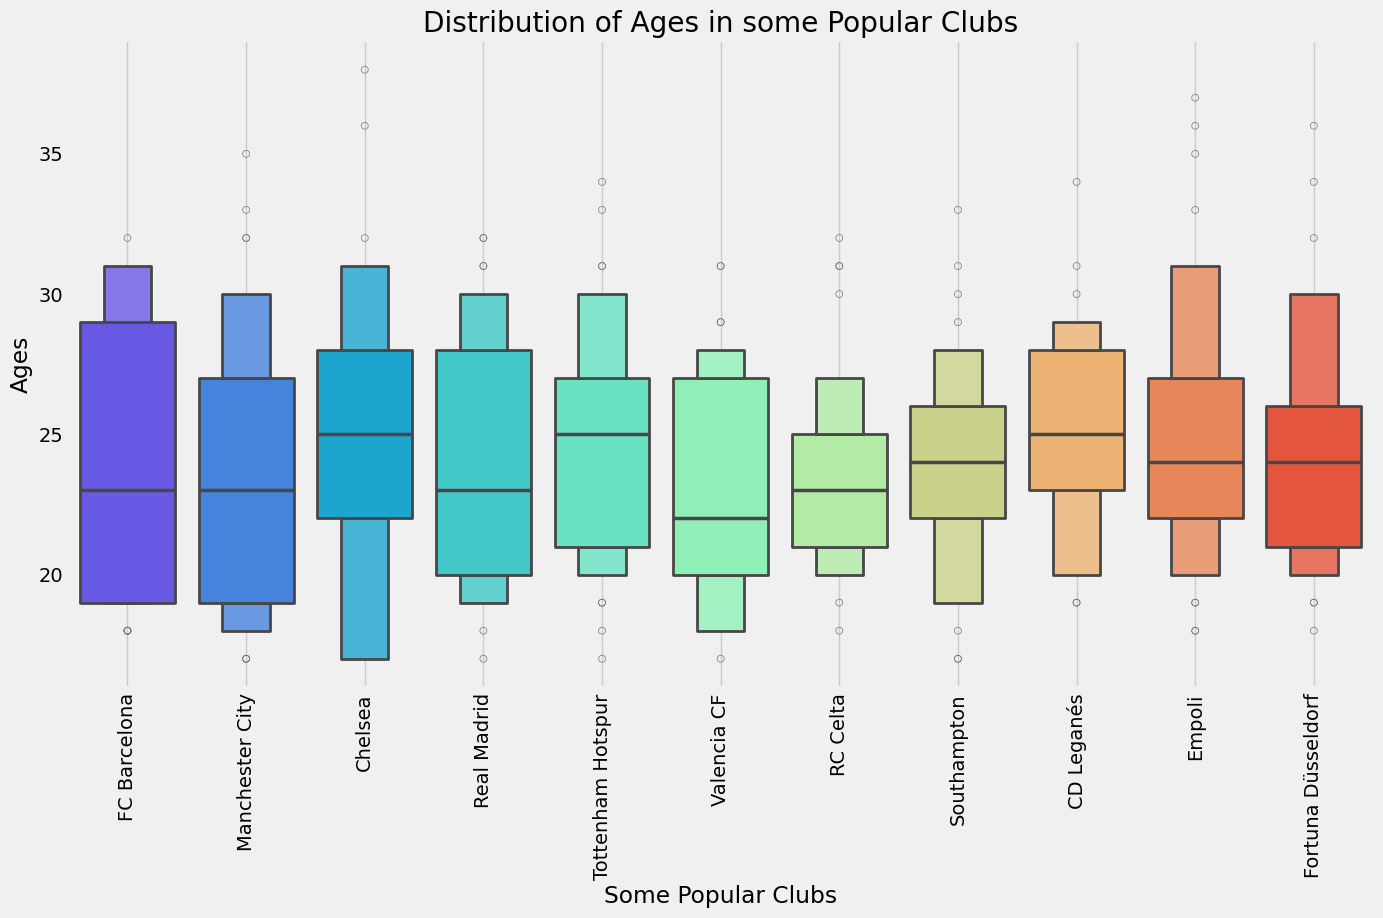

In [107]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta',  'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
              'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = df.loc[df.Club.isin(some_clubs) & df.Wage]

plt.figure(figsize=(15,8))
sns.boxenplot(x=data_clubs.Club,y=data_clubs.Age,palette='rainbow')
plt.xlabel('Some Popular Clubs')
plt.ylabel('Ages')
plt.title('Distribution of Ages in some Popular Clubs')
plt.xticks(rotation=90)
plt.grid()
plt.show()

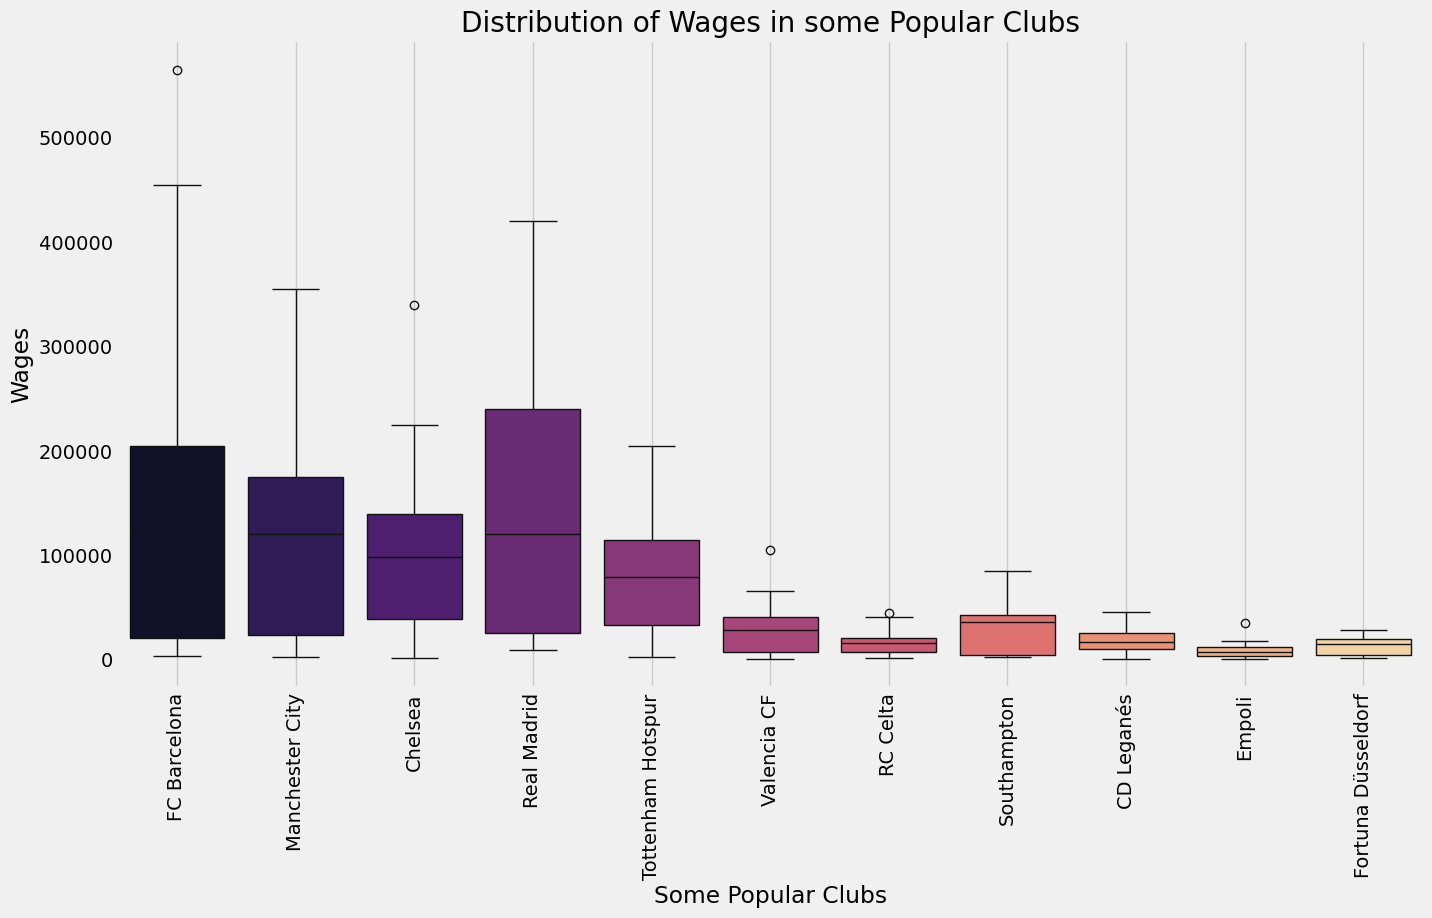

In [108]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta',  'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
              'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = df.loc[df.Club.isin(some_clubs) & df.Wage]

plt.figure(figsize=(15,8))
sns.boxplot(x=data_clubs.Club,y=data_clubs.Wage,palette='magma')
plt.xlabel('Some Popular Clubs')
plt.ylabel('Wages')
plt.title('Distribution of Wages in some Popular Clubs')
plt.xticks(rotation=90)
plt.grid()
plt.show()

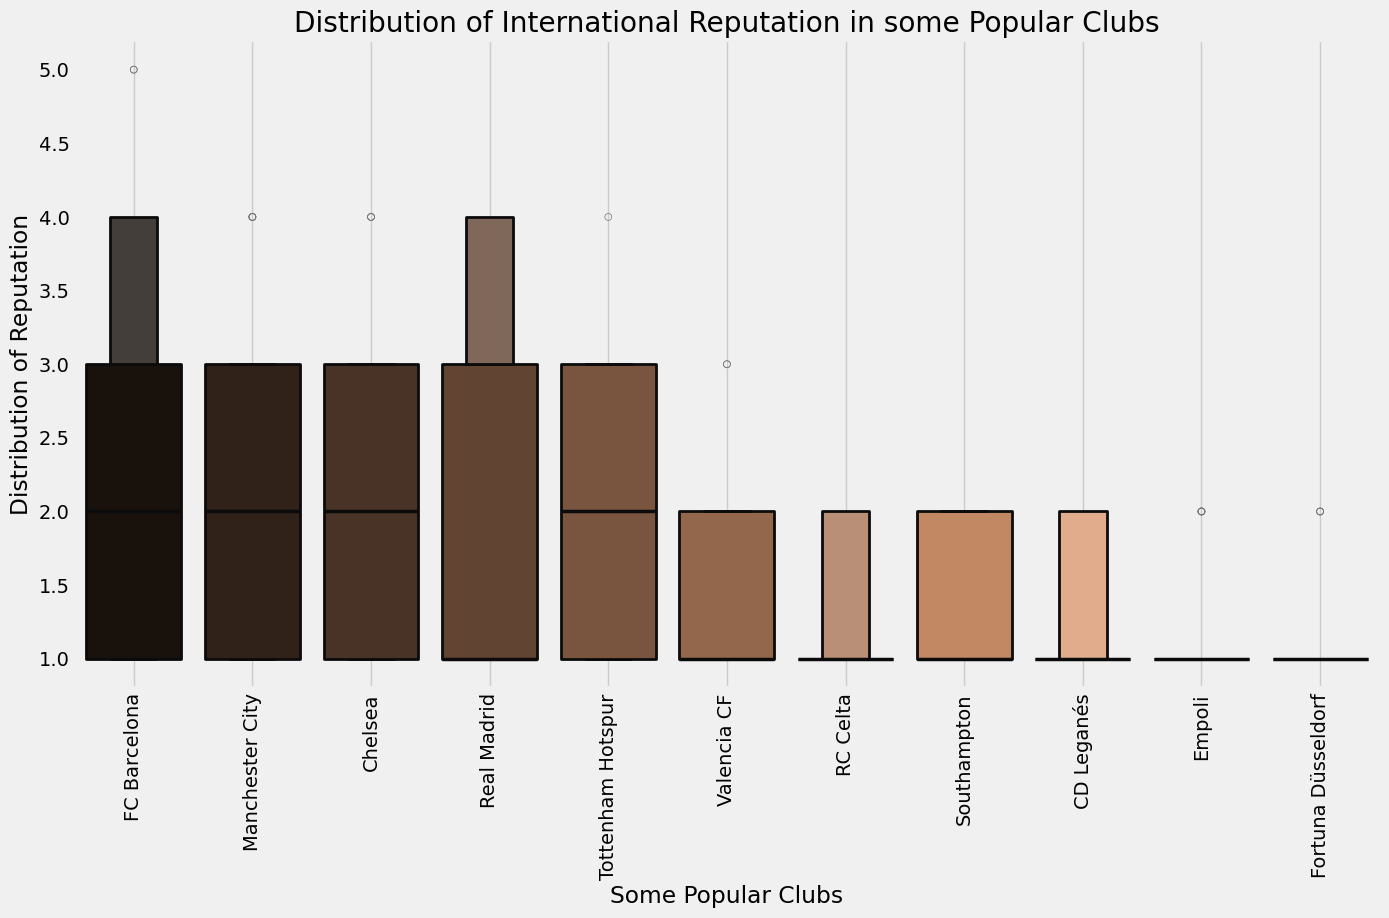

In [109]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta',  'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
              'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = df.loc[df.Club.isin(some_clubs) & df['International Reputation']]

plt.figure(figsize=(15,8))
sns.boxenplot(x=data_clubs.Club,y=data_clubs['International Reputation'],palette='copper')
plt.xlabel('Some Popular Clubs')
plt.ylabel('Distribution of Reputation')
plt.title('Distribution of International Reputation in some Popular Clubs')
plt.xticks(rotation=90)
plt.grid()
plt.show()

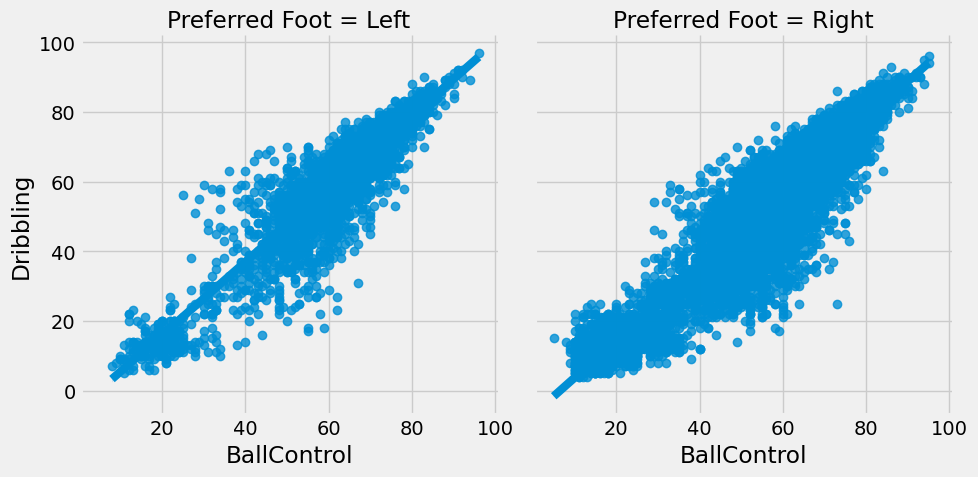

In [110]:
sns.lmplot(x='BallControl',y='Dribbling',data=df,col='Preferred Foot')
plt.show()

## Query Analysis

#### Best Players per each position with their age, club and nationality based on their Overall Scores

In [111]:
# Index of Players with highest overall score in each position 
filter1 = df.groupby(df['Position'])['Overall'].idxmax()
filter1 

Position
CAM     17
CB      12
CDM     20
CF     271
CM      67
GK       3
LAM     28
LB      35
LCB     24
LCM     11
LDM     14
LF       5
LM      33
LS      21
LW       2
LWB    474
RAM    129
RB      69
RCB      8
RCM      4
RDM     45
RF       0
RM      25
RS       7
RW      56
RWB    450
ST       1
Name: Overall, dtype: int64

In [112]:
df.iloc[filter1][['Position','Name','Age','Club','Nationality','Overall']].sort_values('Overall',
                ascending=False).style.background_gradient('Purples')

#### Best Players for each Skill

In [113]:
@interact
def skill(skills = ['Defending','Passing','General','Mental','Mobility','Power','Rating','Shooting'],score=75):
    return df[df[skills]>score][['Name','Nationality','Club','Overall',skills]].sort_values(skills,
                                ascending=False).head(20).style.background_gradient('Oranges')

interactive(children=(Dropdown(description='skills', options=('Defending', 'Passing', 'General', 'Mental', 'Mo…

#### Top 15 Players from each country

In [114]:
@interact
def country(country = list(df.Nationality.value_counts().index)):
    return df[df.Nationality == country][['Name','Position','Overall','Potential']].sort_values('Overall',
                                        ascending=False).head(15).style.background_gradient('Purples')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [115]:
list(df.Nationality.value_counts().index)

['England',
 'Germany',
 'Spain',
 'Argentina',
 'France',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands',
 'Sweden',
 'China PR',
 'Chile',
 'Republic of Ireland',
 'Mexico',
 'United States',
 'Poland',
 'Norway',
 'Saudi Arabia',
 'Denmark',
 'Korea Republic',
 'Portugal',
 'Turkey',
 'Austria',
 'Scotland',
 'Belgium',
 'Australia',
 'Switzerland',
 'Uruguay',
 'Senegal',
 'Wales',
 'Serbia',
 'Croatia',
 'Nigeria',
 'Ghana',
 'Greece',
 'Ivory Coast',
 'Czech Republic',
 'Cameroon',
 'Morocco',
 'Paraguay',
 'Northern Ireland',
 'Russia',
 'Ukraine',
 'South Africa',
 'Finland',
 'Venezuela',
 'Canada',
 'Bosnia Herzegovina',
 'Algeria',
 'Slovenia',
 'Romania',
 'Slovakia',
 'DR Congo',
 'Iceland',
 'New Zealand',
 'Mali',
 'Ecuador',
 'Albania',
 'Hungary',
 'Peru',
 'Kosovo',
 'Jamaica',
 'Bulgaria',
 'Tunisia',
 'Egypt',
 'Guinea',
 'Bolivia',
 'Costa Rica',
 'India',
 'Georgia',
 'Congo',
 'Montenegro',
 'FYR Macedonia',
 'Cape Verde',
 'Iran',
 'Burkina Faso',
 '

#### Top 15 from Each Club

In [116]:
@interact
def club(club = list(df.Club.value_counts().index)):
    return df[df.Club == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
           'Value','Contract Valid Until']].sort_values('Overall', ascending = False).head(15).style.background_gradient('pink')
    

interactive(children=(Dropdown(description='club', options=('AS Monaco', 'Southampton', 'Cardiff City', 'TSG 1…

#### Youngest Players from FIFA 2019

In [117]:
youngest = df[df.Age == df.Age.min()][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values('Overall',ascending=False).head().style.background_gradient('Blues')

#### 15 Eldest Players from FIFA 2019

In [118]:
df.sort_values('Age',ascending=False)[['Name','Age','Club',
               'Nationality','Overall']].head(15).style.background_gradient('Wistia')

#### Player with Longest Membership in the Club

In [119]:
contract_valid_until = pd.to_datetime(df['Contract Valid Until'],format='mixed').dt.year
club_join_date = pd.to_datetime(df.Joined).dt.year
df['membership'] = contract_valid_until - club_join_date

In [122]:
df[['Name','Club','membership']].set_index('Name').sort_values('membership',
                ascending=False).head(10).style.background_gradient('Greens')

In [124]:
@interact
def check(column = 'membership',
          club = ['FC Barcelona','Real Madrid','Chelsea'],mem = 4):
    return df[(df[column]>mem)&(df.Club==club)][['Name','Club',
                'membership']].sort_values('membership',ascending=False).style.background_gradient('Oranges')

interactive(children=(Text(value='membership', description='column'), Dropdown(description='club', options=('F…

#### Defining the Features of Player according to Position

In [155]:
[i for i in df.columns if ~(df[i].dtype =='O')]

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Contract Valid Until',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKickin

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18159 entries, 0 to 18206
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18159 non-null  int64  
 1   Name                      18159 non-null  object 
 2   Age                       18159 non-null  int64  
 3   Photo                     18159 non-null  object 
 4   Nationality               18159 non-null  object 
 5   Flag                      18159 non-null  object 
 6   Overall                   18159 non-null  int64  
 7   Potential                 18159 non-null  int64  
 8   Club                      18159 non-null  object 
 9   Club Logo                 18159 non-null  object 
 10  Value                     18159 non-null  float64
 11  Wage                      18159 non-null  float64
 12  Special                   18159 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [157]:
player_features = ['Crossing','Finishing','HeadingAccuracy',
                   'ShortPassing','Volleys','Dribbling',
                   'Curve','FKAccuracy','LongPassing',
                   'BallControl','Acceleration','SprintSpeed',
                   'Agility','Reactions','Balance',
                   'ShotPower','Jumping','Stamina',
                   'Strength','LongShots','Aggression',
                   'Interceptions','Positioning','Vision',
                   'Penalties','Composure','Marking',
                   'StandingTackle','SlidingTackle','GKDiving',
                   'GKHandling','GKKicking','GKPositioning', 
                   'GKReflexes','Defending','General',
                   'Mental','Passing','Power',
                   'Mobility','Shooting']

for i,val in df.groupby(df.Position)[player_features].mean().iterrows():
    print('Position {} : {}, {}, {}\n'.format(i,*tuple(val.nlargest(4).index)))

Position CAM : Balance, Agility, Acceleration

Position CB : Strength, Jumping, StandingTackle

Position CDM : Stamina, Aggression, Strength

Position CF : Agility, Balance, Acceleration

Position CM : Balance, ShortPassing, Agility

Position GK : GKReflexes, GKDiving, GKPositioning

Position LAM : Agility, Balance, SprintSpeed

Position LB : SprintSpeed, Acceleration, Stamina

Position LCB : Strength, Jumping, StandingTackle

Position LCM : Stamina, ShortPassing, Balance

Position LDM : Stamina, ShortPassing, Power

Position LF : Balance, Agility, Acceleration

Position LM : Acceleration, SprintSpeed, Agility

Position LS : SprintSpeed, Strength, Acceleration

Position LW : Acceleration, SprintSpeed, Agility

Position LWB : SprintSpeed, Acceleration, Stamina

Position RAM : Agility, Balance, Acceleration

Position RB : SprintSpeed, Stamina, Acceleration

Position RCB : Strength, Jumping, Aggression

Position RCM : Stamina, ShortPassing, Agility

Position RDM : Stamina, ShortPassing, A

#### Top 10 Left Footed Players

In [168]:
df[df['Preferred Foot']=='Left'][['Name','Age','Club','Nationality','Overall']].sort_values('Overall',
                                ascending=False).head(10).style.background_gradient('bone_r')

#### Top 10 Right Footed Players

In [171]:
df[df['Preferred Foot']=='Right'][['Name','Age','Club','Nationality','Overall']].sort_values('Overall',
                                ascending=False).head(10).style.background_gradient('copper')